# Imports:

In [132]:
!pip install squarify
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
from ast import literal_eval

# Data Processing and Cleaning

In [133]:
pokemon_df = pd.read_csv('C:\\Users\\ayxxh\\Desktop\\DataSpell\\Project\\pokemon.csv')

In [134]:
pokemon_df

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,['Beast Boost'],0.25,1.0,0.5,2.0,0.5,1.0,2.0,0.5,1.0,...,NaN,797,107,101,61,steel,flying,999.9,7,1
797,['Beast Boost'],1.00,1.0,0.5,0.5,0.5,2.0,4.0,1.0,1.0,...,NaN,798,59,31,109,grass,steel,0.1,7,1
798,['Beast Boost'],2.00,0.5,2.0,0.5,4.0,2.0,0.5,1.0,0.5,...,NaN,799,97,53,43,dark,dragon,888.0,7,1
799,['Prism Armor'],2.00,2.0,1.0,1.0,1.0,0.5,1.0,1.0,2.0,...,NaN,800,127,89,79,psychic,NaN,230.0,7,1


In [135]:
pokemon_df.columns

Index(['abilities', 'against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water', 'attack',
       'base_egg_steps', 'base_happiness', 'base_total', 'capture_rate',
       'classfication', 'defense', 'experience_growth', 'height_m', 'hp',
       'japanese_name', 'name', 'percentage_male', 'pokedex_number',
       'sp_attack', 'sp_defense', 'speed', 'type1', 'type2', 'weight_kg',
       'generation', 'is_legendary'],
      dtype='object')

# From the above dataframe, we will now remove attributes which are not needed.

In [136]:
pokemon_df.drop(['japanese_name', 'pokedex_number', 'base_egg_steps', 'classfication', 'experience_growth', 'percentage_male'], axis=1, inplace=True)

In [137]:
pokemon_df.isnull().sum()[pokemon_df.columns[pokemon_df.isnull().any()]]

height_m      20
type2        384
weight_kg     20
dtype: int64

In [138]:
pokemon_df[pokemon_df['height_m'].isna()]

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,hp,name,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
18,"['Run Away', 'Guts', 'Hustle', 'Gluttony', 'Hu...",1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,0.0,...,30,Rattata,25,35,72,normal,dark,NaN,1,0
19,"['Run Away', 'Guts', 'Hustle', 'Gluttony', 'Hu...",1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,0.0,...,75,Raticate,40,80,77,normal,dark,NaN,1,0
25,"['Static', 'Lightningrod', 'Surge Surfer']",1.0,1.0,1.0,0.5,1.0,1.0,1.0,0.5,1.0,...,60,Raichu,95,85,110,electric,electric,NaN,1,0
26,"['Sand Veil', 'Sand Rush', 'Snow Cloak', 'Slus...",1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,50,Sandshrew,10,35,40,ground,ice,NaN,1,0
27,"['Sand Veil', 'Sand Rush', 'Snow Cloak', 'Slus...",1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,75,Sandslash,25,65,65,ground,ice,NaN,1,0
36,"['Flash Fire', 'Drought', 'Snow Cloak', 'Snow ...",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,38,Vulpix,50,65,65,fire,ice,NaN,1,0
37,"['Flash Fire', 'Drought', 'Snow Cloak', 'Snow ...",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,73,Ninetales,81,100,109,fire,ice,NaN,1,0
49,"['Sand Veil', 'Arena Trap', 'Sand Force', 'San...",1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,10,Diglett,35,45,90,ground,ground,NaN,1,0
50,"['Sand Veil', 'Arena Trap', 'Sand Force', 'San...",1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,35,Dugtrio,50,70,110,ground,ground,NaN,1,0
51,"['Pickup', 'Technician', 'Unnerve', 'Pickup', ...",1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,0.0,...,40,Meowth,50,40,90,normal,dark,NaN,1,0


In [139]:
pokemon_df[pokemon_df['weight_kg'].isna()]

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,hp,name,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
18,"['Run Away', 'Guts', 'Hustle', 'Gluttony', 'Hu...",1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,0.0,...,30,Rattata,25,35,72,normal,dark,NaN,1,0
19,"['Run Away', 'Guts', 'Hustle', 'Gluttony', 'Hu...",1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,0.0,...,75,Raticate,40,80,77,normal,dark,NaN,1,0
25,"['Static', 'Lightningrod', 'Surge Surfer']",1.0,1.0,1.0,0.5,1.0,1.0,1.0,0.5,1.0,...,60,Raichu,95,85,110,electric,electric,NaN,1,0
26,"['Sand Veil', 'Sand Rush', 'Snow Cloak', 'Slus...",1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,50,Sandshrew,10,35,40,ground,ice,NaN,1,0
27,"['Sand Veil', 'Sand Rush', 'Snow Cloak', 'Slus...",1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,75,Sandslash,25,65,65,ground,ice,NaN,1,0
36,"['Flash Fire', 'Drought', 'Snow Cloak', 'Snow ...",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,38,Vulpix,50,65,65,fire,ice,NaN,1,0
37,"['Flash Fire', 'Drought', 'Snow Cloak', 'Snow ...",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,73,Ninetales,81,100,109,fire,ice,NaN,1,0
49,"['Sand Veil', 'Arena Trap', 'Sand Force', 'San...",1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,10,Diglett,35,45,90,ground,ground,NaN,1,0
50,"['Sand Veil', 'Arena Trap', 'Sand Force', 'San...",1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,35,Dugtrio,50,70,110,ground,ground,NaN,1,0
51,"['Pickup', 'Technician', 'Unnerve', 'Pickup', ...",1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,0.0,...,40,Meowth,50,40,90,normal,dark,NaN,1,0


# We see that height and weight have 20 missing values, so we will now add the missing data in pokemon_df.

In [140]:
heights_to_add = {18: 0.3, 19: 0.7, 25: 0.8, 26: 0.6, 27: 1.0, 36: 0.6, 37: 1.1, 49: 0.2, 50: 0.7, 51: 0.4, 52: 1.0,
                  73: 0.4, 74: 1.0, 75: 1.4, 87: 0.9, 88: 1.2, 102: 2.0, 104: 1.0, 719: 0.5, 744: 0.8}

weights_to_add = {18: 3.5, 19: 18.5, 25: 30.0, 26: 12.0, 27: 29.5, 36: 9.9, 37: 19.9, 49: 0.8, 50: 33.3, 51: 4.2,
                  52: 32.0, 73: 20.0, 74: 105.0, 75: 300.0, 87: 30.0, 88: 30.0, 102: 120.0, 104: 45.0, 719: 9.0,
                  744: 25.0}
for i in heights_to_add.keys():
    pokemon_df.at[i, 'height_m'] = heights_to_add[i]

for i in weights_to_add.keys():
    pokemon_df.at[i, 'weight_kg'] = weights_to_add[i]


# Determining color for plots based on pokemon type:

In [141]:
pokemon_types = pokemon_df['type1'].unique()

type_colors = ["#8ED752", "#F95643", "#53AFFE", "#C3D221", "#BBBDAF","#AD5CA2", "#F8E64E", "#F0CA42", "#F9AEFE", "#A35449",
               "#FB61B4", "#CDBD72", "#7673DA", "#66EBFF", "#8B76FF", "#8E6856", "#C3C1D7", "#75A4F9"]

pokemon_colors = dict(zip(pokemon_types, type_colors))

print(pokemon_colors)

{'grass': '#8ED752', 'fire': '#F95643', 'water': '#53AFFE', 'bug': '#C3D221', 'normal': '#BBBDAF', 'poison': '#AD5CA2', 'electric': '#F8E64E', 'ground': '#F0CA42', 'fairy': '#F9AEFE', 'fighting': '#A35449', 'psychic': '#FB61B4', 'rock': '#CDBD72', 'ghost': '#7673DA', 'ice': '#66EBFF', 'dragon': '#8B76FF', 'dark': '#8E6856', 'steel': '#C3C1D7', 'flying': '#75A4F9'}


In [142]:
pokemon_df.describe().T

,count,mean,std,min,25%,50%,75%,max
against_bug,801.0,0.996255,0.597248,0.25,0.5,1.0,1.0,4.0
against_dark,801.0,1.057116,0.438142,0.25,1.0,1.0,1.0,4.0
against_dragon,801.0,0.968789,0.353058,0.00,1.0,1.0,1.0,2.0
against_electric,801.0,1.073970,0.654962,0.00,0.5,1.0,1.0,4.0
against_fairy,801.0,1.068976,0.522167,0.25,1.0,1.0,1.0,4.0
against_fight,801.0,1.065543,0.717251,0.00,0.5,1.0,1.0,4.0
against_fire,801.0,1.135456,0.691853,0.25,0.5,1.0,2.0,4.0
against_flying,801.0,1.192884,0.604488,0.25,1.0,1.0,1.0,4.0
against_ghost,801.0,0.985019,0.558256,0.00,1.0,1.0,1.0,4.0
against_grass,801.0,1.034020,0.788896,0.25,0.5,1.0,1.0,4.0


# Data Analysis:

# Legendary Pie Chart:

In [143]:
pokemon_df['is_legendary']
l_freq = pokemon_df.is_legendary.value_counts()
print(l_freq)

0    731
1     70
Name: is_legendary, dtype: int64


([<matplotlib.patches.Wedge at 0x207b8b10a30>,
 [Text(-1.155057980818479, 0.32533223164564906, 'Non-Legendary'),
  Text(1.1550579579736249, -0.32533231275389773, 'Legendary')],
 [Text(-0.6737838221441127, 0.18977713512662858, '91.3%'),
  Text(0.6737838088179479, -0.18977718243977368, '8.7%')])

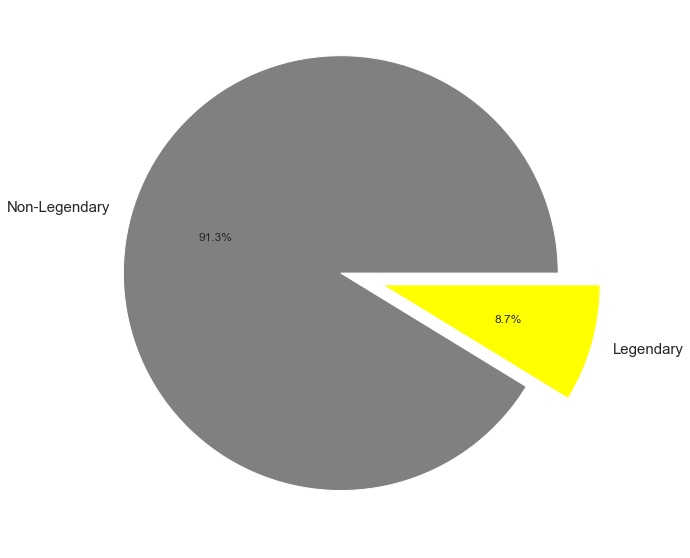

In [144]:

plt.figure(figsize=(10, 10))
plt.pie(l_freq,
        labels=['Non-Legendary', 'Legendary'],
        autopct='%2.1f%%',
        colors=['grey', 'yellow'],
        startangle=0,
        explode=[0.1, 0.1])

# Generation Pie Chart:


In [145]:
gen_freq = pokemon_df.generation.value_counts(sort=False)
print(gen_freq)

1    151
2    100
3    135
4    107
5    156
6     72
7     80
Name: generation, dtype: int64


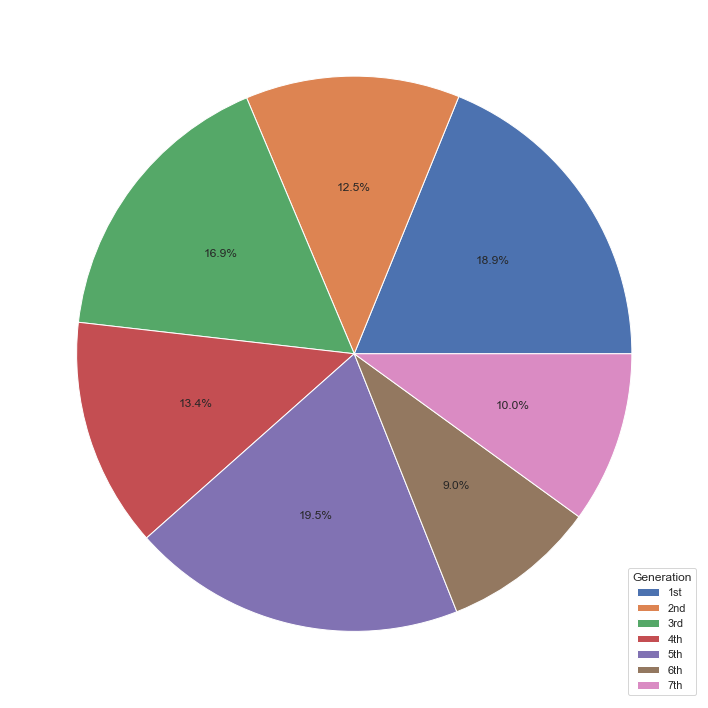

In [146]:
gen = ['1st', '2nd', '3rd', '4th', '5th', '6th', '7th']
plt.figure(figsize=(10, 10))
plt.pie(gen_freq,
        autopct='%2.1f%%',
        startangle=0,
        )
plt.legend(labels=gen, loc=4, title='Generation')
plt.tight_layout()

# Primary Type TreeMap:

In [147]:
t1_freq=pokemon_df.type1.value_counts()
print(t1_freq)

water       114
normal      105
grass        78
bug          72
psychic      53
fire         52
rock         45
electric     39
poison       32
ground       32
dark         29
fighting     28
ghost        27
dragon       27
steel        24
ice          23
fairy        18
flying        3
Name: type1, dtype: int64


(0.0, 100.0, 0.0, 100.0)

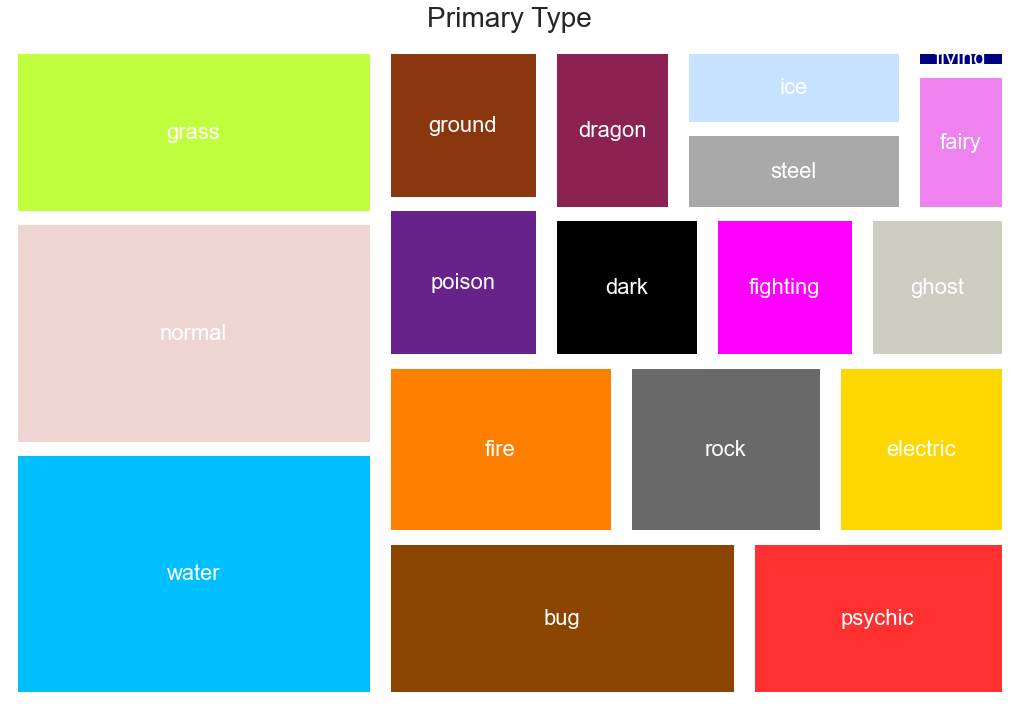

In [148]:
plt.figure(figsize=(18, 12))
tm=squarify.plot(t1_freq,
                 label=t1_freq.index,
                 color=['#00BFFF','#EED5D2','#C0FF3E','#8B4500','#FF3030','#FF8000','#696969','#FFD700','#68228B','#8A360F','#000000','#FF00FF','#CDCDC1','#8B2252','#A9A9A9','#C6E2FF','#EE82EE','#000080'],
                 pad=0.1,
                 text_kwargs={'fontsize': 22, 'color': 'white'})
tm.set_title('Primary Type', fontsize=28, pad=20)
plt.axis('off')

# Type of legendary Pokémon Bar plot:

In [149]:
pokemon_df['type'] = pokemon_df['type1'] + '_' + pokemon_df['type2'].fillna('')
legendary = pokemon_df[pokemon_df['is_legendary'] == 1]
legendary_type = legendary["type"].value_counts(sort=True)[:10]
legendary_type

psychic_           10
water_              3
normal_             2
dragon_psychic      2
fire_flying         2
electric_           2
electric_flying     2
psychic_ghost       2
bug_fighting        2
rock_fairy          1
Name: type, dtype: int64

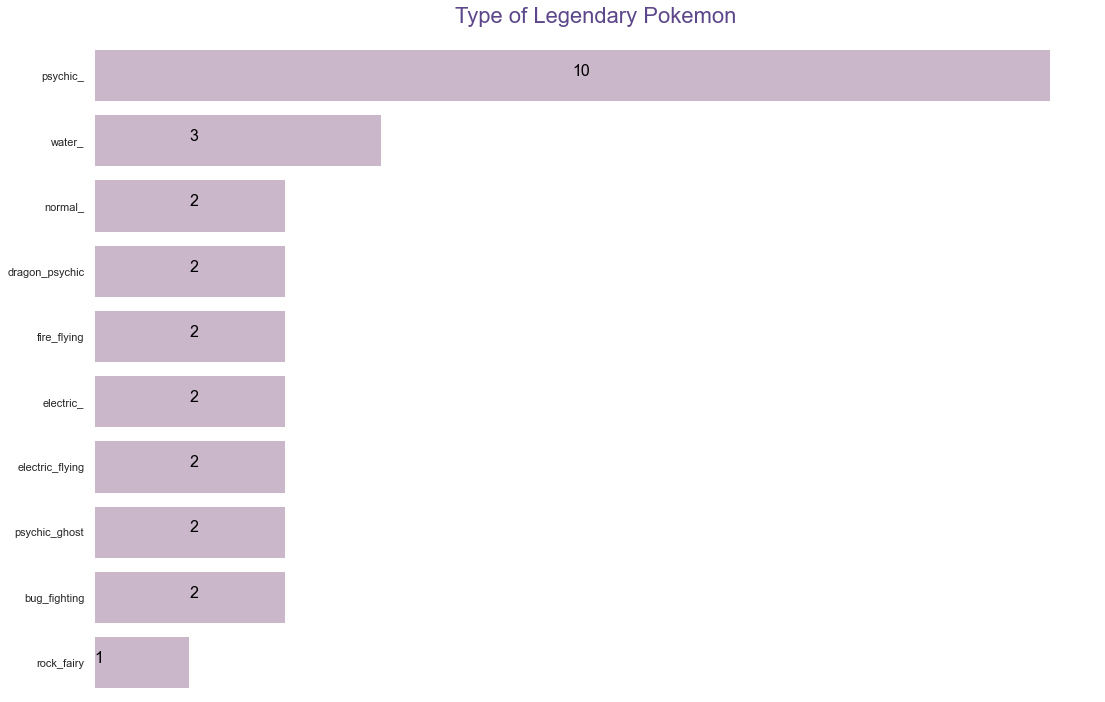

In [150]:
plt.figure(figsize=(18, 12))
sns.set(style='white')
b=sns.barplot(y=legendary_type.index,
              x=legendary_type.values,
              orient='h',
              color='#CDB5CD')

b.set(xticklabels=[])
sns.despine(top=True, right=True, left=True, bottom=True)
b.set_title('Type of Legendary Pokemon', fontsize=22, pad=20, color='#5D478B')

for index, value in enumerate(legendary_type):
    plt.annotate(f'{value}', xy=(value//2, index), color='black', fontsize=16)

# Primary and Secondary Type:

In [151]:
type1_freq = pokemon_df.type1.value_counts()
type2_freq = pokemon_df.type2.value_counts()
types_data = pd.concat([type1_freq, type2_freq], axis=1)
types_data

,type1,type2
water,114,17
normal,105,4
grass,78,20
bug,72,5
psychic,53,29
fire,52,13
rock,45,14
electric,39,9
poison,32,34
ground,32,34


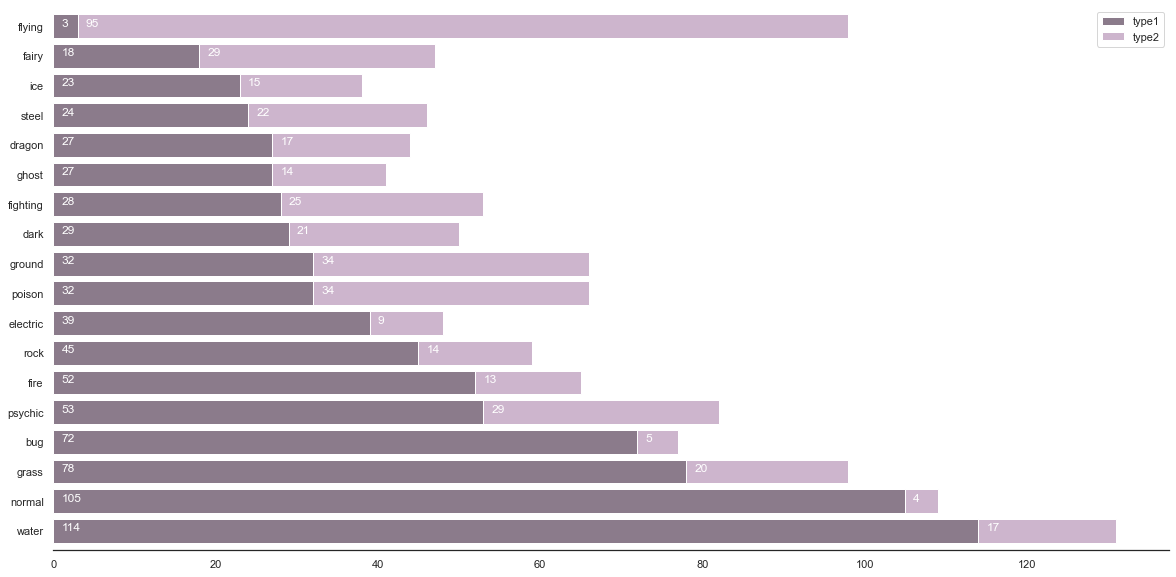

In [152]:
types_data.plot.barh(stacked=True, color=['#8B7B8B', '#CDB5CD'], width=0.8, figsize=(20, 10))
sns.despine(top=True, right=True, left=True)
for index, row in enumerate(types_data.iterrows()):
    plt.annotate(f'{row[1]["type1"]}', xy=(1, index), color='white')
    plt.annotate(f'{row[1]["type2"]}', xy=(row[1]['type1'] + 1, index), color='white')

# Attack:

Text(0.5, 1.0, 'Analysis of Base attack of pokemon')

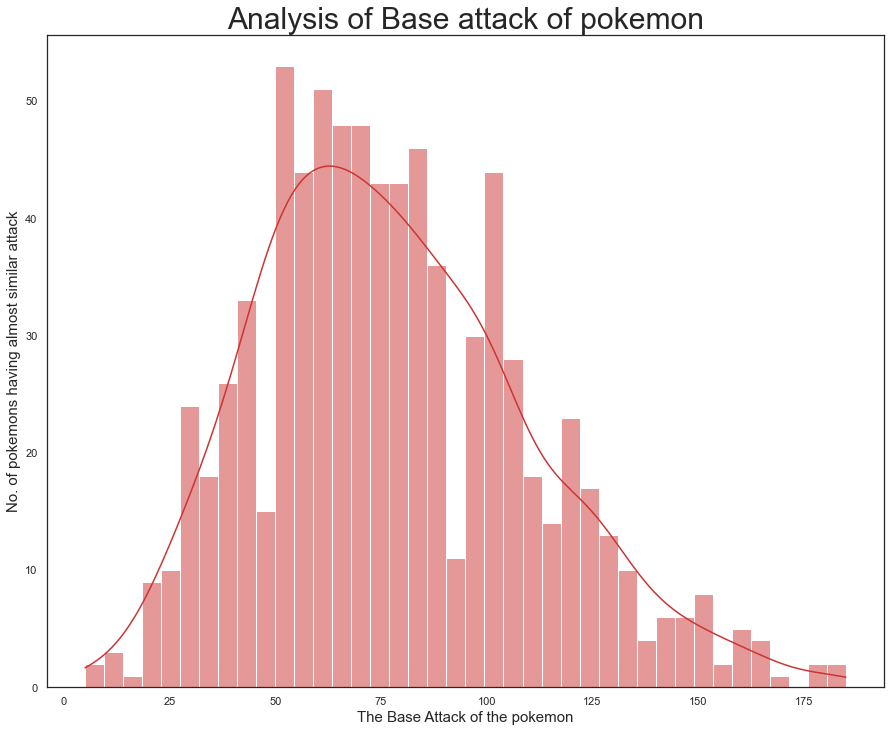

In [153]:
plt.figure(figsize=(15,12))
sns.histplot(pokemon_df,x='attack', bins=40, color='#CD3333', kde=True)
plt.xlabel("The Base Attack of the pokemon",fontsize=15)
plt.ylabel("No. of pokemons having almost similar attack",fontsize=15)
plt.title("Analysis of Base attack of pokemon",fontsize=30)

In [154]:
pokemon_df.attack.describe()

count    801.000000
mean      77.857678
std       32.158820
min        5.000000
25%       55.000000
50%       75.000000
75%      100.000000
max      185.000000
Name: attack, dtype: float64

In [155]:
pokemon_df.nlargest(5,'attack')

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,name,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary,type
213,"['Swarm', 'Guts', 'Moxie']",0.5,0.5,1.0,1.0,2.0,0.5,2.0,4.0,1.0,...,Heracross,40,105,75,bug,fighting,54.0,2,0,bug_fighting
797,['Beast Boost'],1.0,1.0,0.5,0.5,0.5,2.0,4.0,1.0,1.0,...,Kartana,59,31,109,grass,steel,0.1,7,1,grass_steel
382,['Drought'],1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,Groudon,150,90,90,ground,NaN,950.0,3,1,ground_
383,['Air Lock'],0.5,1.0,2.0,1.0,2.0,0.5,0.5,1.0,1.0,...,Rayquaza,180,100,115,dragon,flying,206.5,3,1,dragon_flying
444,"['Sand Veil', 'Rough Skin']",1.0,1.0,2.0,0.0,2.0,1.0,0.5,1.0,1.0,...,Garchomp,120,95,92,dragon,ground,95.0,4,0,dragon_ground


# Speed:

Text(0.5, 1.0, 'Analysis of Speed')

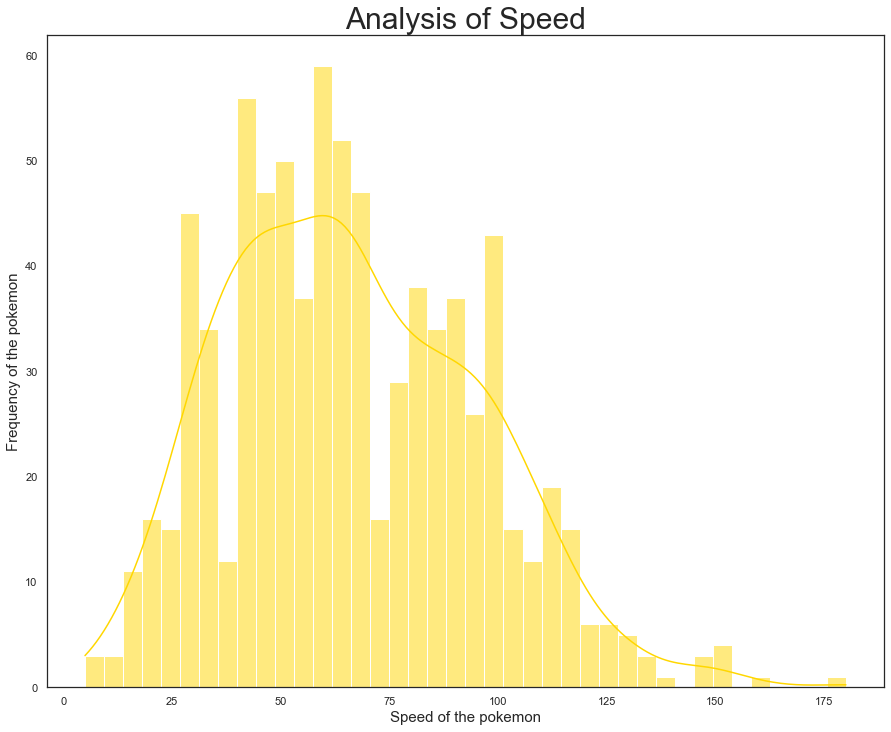

In [156]:
plt.figure(figsize=(15,12))
sns.histplot(pokemon_df,x='speed', bins=40, color='#FFD700', kde=True)
plt.xlabel("Speed of the pokemon",fontsize=15)
plt.ylabel("Frequency of the pokemon",fontsize=15)
plt.title("Analysis of Speed",fontsize=30)

In [157]:
pokemon_df.speed.describe()

count    801.000000
mean      66.334582
std       28.907662
min        5.000000
25%       45.000000
50%       65.000000
75%       85.000000
max      180.000000
Name: speed, dtype: float64

In [158]:
pokemon_df.nlargest(5,'speed')

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,name,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary,type
385,['Pressure'],2.0,2.0,1.0,1.0,1.0,0.50,1.0,1.0,2.0,...,Deoxys,95,90,180,psychic,NaN,60.8,3,1,psychic_
290,"['Speed Boost', 'Infiltrator']",0.5,1.0,1.0,2.0,1.0,0.25,2.0,2.0,1.0,...,Ninjask,50,50,160,bug,flying,12.0,3,0,bug_flying
794,['Beast Boost'],0.5,0.5,1.0,1.0,2.0,0.50,2.0,4.0,1.0,...,Pheromosa,137,37,151,bug,fighting,25.0,7,1,bug_fighting
64,"['Synchronize', 'Inner Focus', 'Magic Guard']",2.0,2.0,1.0,1.0,1.0,0.50,1.0,1.0,2.0,...,Alakazam,175,105,150,psychic,NaN,48.0,1,0,psychic_
100,"['Soundproof', 'Static', 'Aftermath']",1.0,1.0,1.0,0.5,1.0,1.00,1.0,0.5,1.0,...,Electrode,80,80,150,electric,NaN,66.6,1,0,electric_


# Defence:

Text(0.5, 1.0, 'Analysis of Base defense of pokemon')

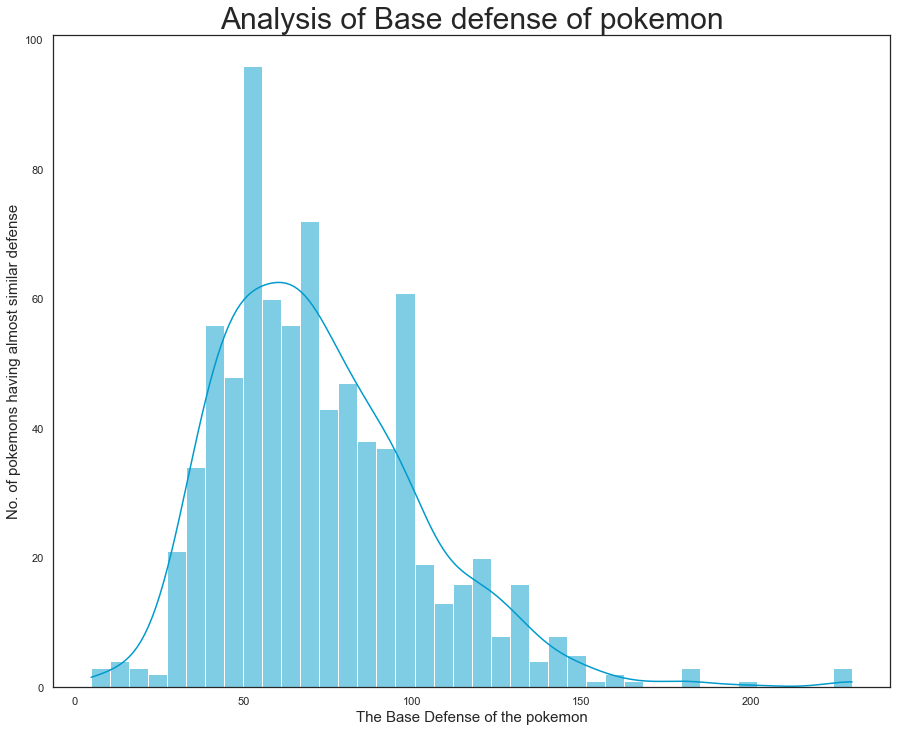

In [159]:
plt.figure(figsize=(15,12))
sns.histplot(pokemon_df, x='defense', bins=40, color='#009ACD', kde=True)
plt.xlabel("The Base Defense of the pokemon",fontsize=15)
plt.ylabel("No. of pokemons having almost similar defense",fontsize=15)
plt.title("Analysis of Base defense of pokemon",fontsize=30)

In [160]:
pokemon_df.defense.describe()

count    801.000000
mean      73.008739
std       30.769159
min        5.000000
25%       50.000000
50%       70.000000
75%       90.000000
max      230.000000
Name: defense, dtype: float64

In [161]:
pokemon_df.nlargest(5,'defense')

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,name,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary,type
207,"['Rock Head', 'Sturdy', 'Sheer Force']",0.5,1.0,0.5,0.0,0.5,2.0,2.0,0.50,1.0,...,Steelix,55,95,30,steel,ground,400.0,2,0,steel_ground
212,"['Sturdy', 'Gluttony', 'Contrary']",1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.00,1.0,...,Shuckle,10,230,5,bug,rock,20.5,2,0,bug_rock
305,"['Sturdy', 'Rock Head', 'Heavy Metal']",0.5,1.0,0.5,1.0,0.5,4.0,1.0,0.25,1.0,...,Aggron,60,80,50,steel,rock,360.0,3,0,steel_rock
376,"['Clear Body', 'Sturdy']",1.0,1.0,1.0,1.0,1.0,2.0,0.5,0.50,1.0,...,Regirock,50,100,50,rock,NaN,230.0,3,1,rock_
712,"['Own Tempo', 'Ice Body', 'Sturdy']",1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.00,1.0,...,Avalugg,44,46,28,ice,NaN,505.0,6,0,ice_


# Hit points:

Text(0.5, 1.0, 'Analysis of Hit points')

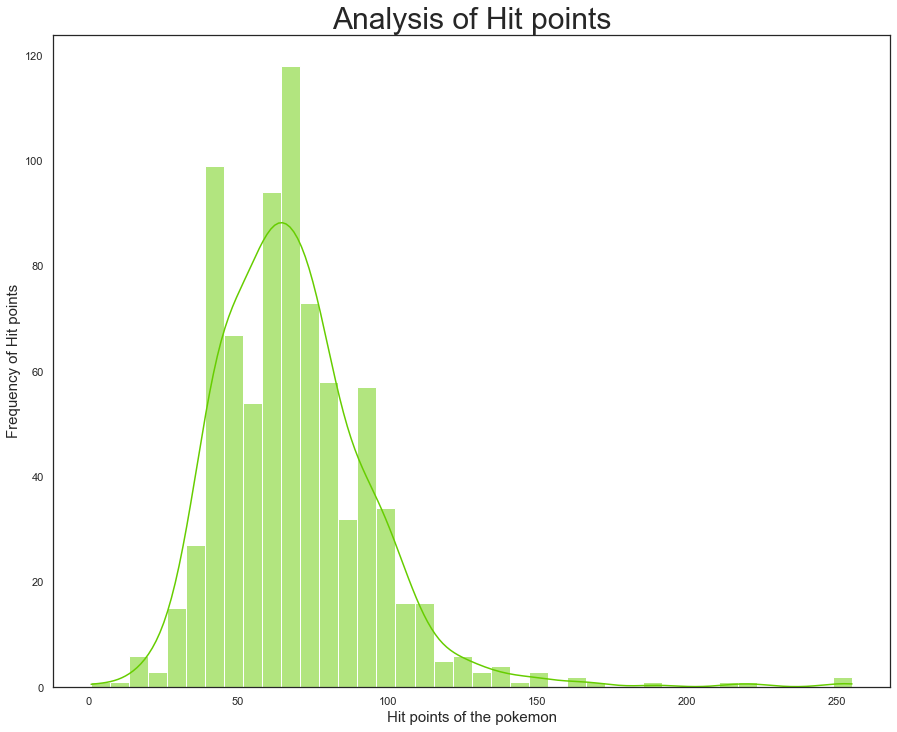

In [162]:
plt.figure(figsize=(15,12))
sns.histplot(pokemon_df,x='hp', bins=40, color='#66CD00', kde=True)
plt.xlabel("Hit points of the pokemon",fontsize=15)
plt.ylabel("Frequency of Hit points",fontsize=15)
plt.title("Analysis of Hit points",fontsize=30)

In [163]:
pokemon_df.hp.describe()

count    801.000000
mean      68.958801
std       26.576015
min        1.000000
25%       50.000000
50%       65.000000
75%       80.000000
max      255.000000
Name: hp, dtype: float64

In [164]:
pokemon_df.nlargest(5,'hp')

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,name,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary,type
241,"['Natural Cure', 'Serene Grace', 'Healer']",1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,0.0,...,Blissey,75,135,55,normal,NaN,46.8,2,0,normal_
112,"['Natural Cure', 'Serene Grace', 'Healer']",1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,0.0,...,Chansey,35,105,50,normal,NaN,34.6,1,0,normal_
798,['Beast Boost'],2.0,0.5,2.0,0.5,4.0,2.0,0.5,1.0,0.5,...,Guzzlord,97,53,43,dark,dragon,888.0,7,1,dark_dragon
717,"['Aura Break', 'Power Construct']",1.0,1.0,2.0,0.0,2.0,1.0,0.5,1.0,1.0,...,Zygarde,91,95,85,dragon,ground,284.6,6,1,dragon_ground
201,"['Shadow Tag', 'Telepathy']",2.0,2.0,1.0,1.0,1.0,0.5,1.0,1.0,2.0,...,Wobbuffet,33,58,33,psychic,NaN,28.5,2,0,psychic_


# Plotting Height based on Pokemon-Type:

In [165]:
heights = {}
for i in range(18):
    heights['height_'+pokemon_types[i]]= []

j = 0
for i in heights:
    heights[i] = pokemon_df.loc[pokemon_df['type1']==pokemon_types[j], "height_m"]
    j = j + 1

print(heights)

{'height_grass': 0      0.7
1      1.0
2      2.0
42     0.5
43     0.8
      ... 
760    0.3
761    0.7
762    1.2
786    1.9
797    0.3
Name: height_m, Length: 78, dtype: float64, 'height_fire': 3      0.6
4      1.1
5      1.7
36     0.6
37     1.1
57     0.7
58     1.9
76     1.0
77     1.7
125    1.3
135    0.9
145    2.0
154    0.5
155    0.9
156    1.7
217    0.7
218    0.8
239    0.7
243    2.1
249    3.8
254    0.4
255    0.9
256    1.9
321    0.7
322    1.9
323    0.5
389    0.5
390    0.9
391    1.2
466    1.6
484    1.7
497    0.5
498    1.0
499    1.6
512    0.6
513    1.0
553    0.6
554    1.3
630    1.4
652    0.4
653    1.0
654    1.5
661    0.7
662    1.2
666    0.6
667    1.5
720    1.7
724    0.4
725    0.7
726    1.8
740    0.6
775    2.0
Name: height_m, dtype: float64, 'height_water': 6      0.5
7      1.0
8      1.6
53     0.8
54     1.7
      ... 
750    0.3
751    1.8
770    0.3
778    0.9
787    1.3
Name: height_m, Length: 114, dtype: float64, 'height_bug': 9  

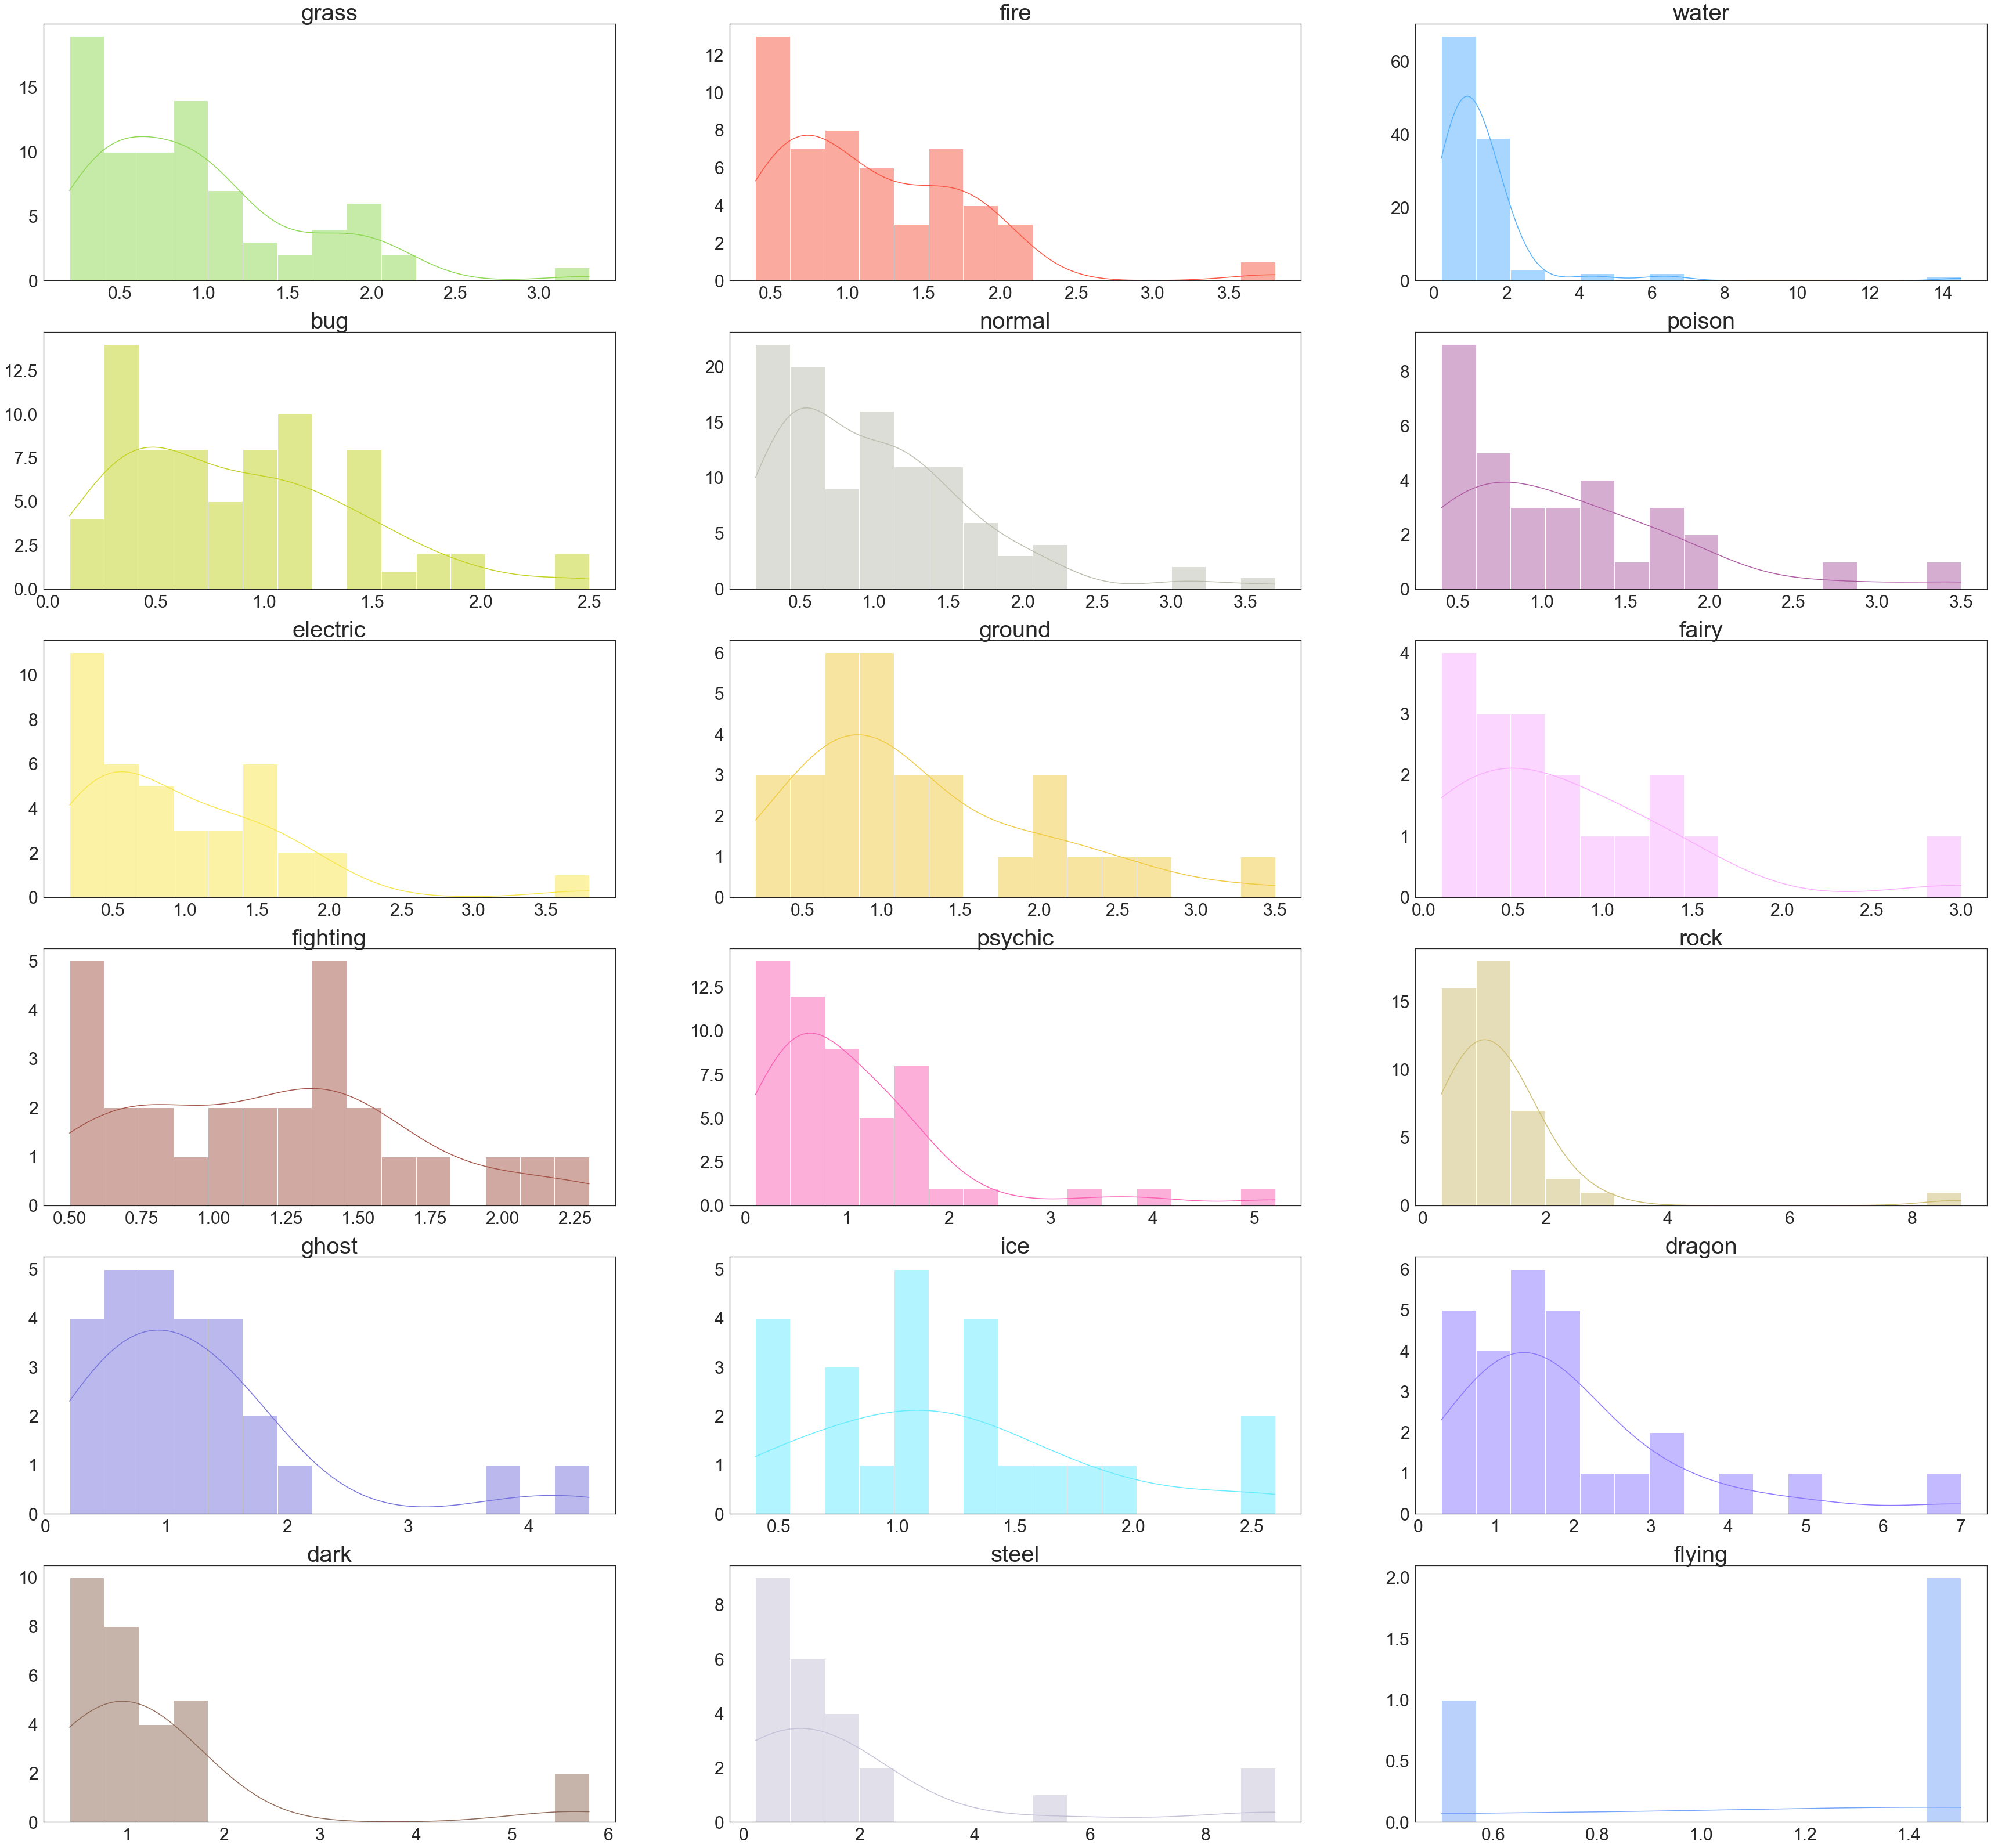

In [166]:
plt.subplots(figsize=(60,57))
sns.set(rc={'xtick.labelsize': 30, 'ytick.labelsize': 30, 'axes.titlesize': 40}, style='white')
j = 0
for i in heights:
    plt.subplot(6,3,j+1)
    sns.histplot(heights[i], bins=15 , color=pokemon_colors[pokemon_types[j]], kde= True).set(title=pokemon_types[j],xlabel=None,ylabel=None)
    j = j + 1

Text(0.5, 1.0, 'Analysis of Height distribution')

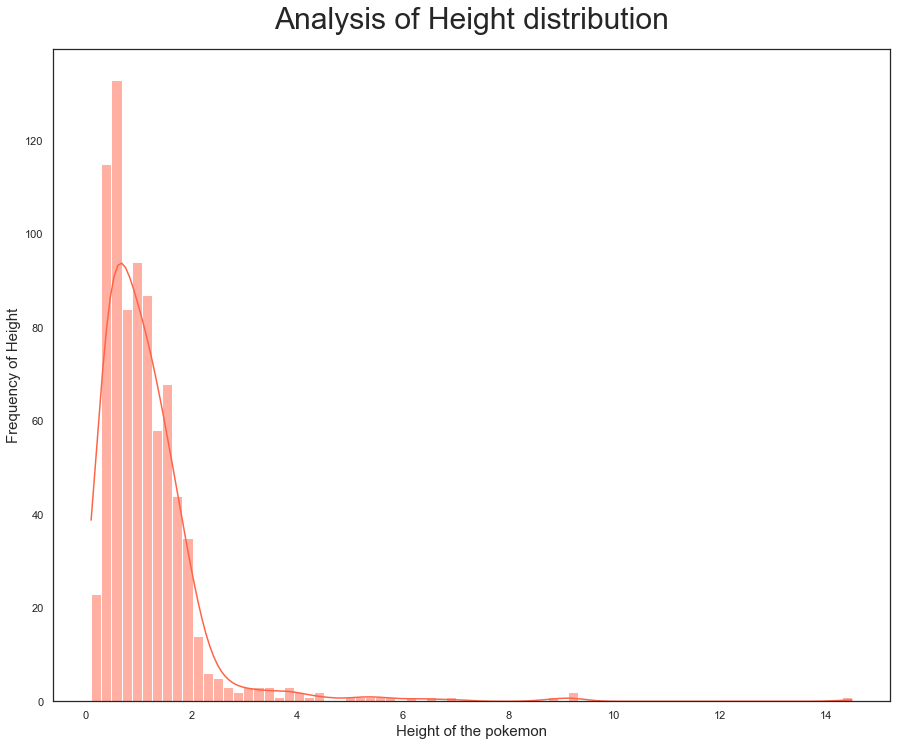

In [167]:
sns.set(rc={'xtick.labelsize': 11, 'ytick.labelsize': 11, 'axes.titlesize': 15, "axes.grid":False}, style='white')
plt.figure(figsize=(15,12))
sns.histplot(pokemon_df,x='height_m', color='#FF6347', kde=True )
plt.xlabel("Height of the pokemon",fontsize=15)
plt.ylabel("Frequency of Height",fontsize=15)
plt.title("Analysis of Height distribution",fontsize=30, pad=20)

In [168]:
pokemon_df.height_m.describe()

count    801.000000
mean       1.155556
std        1.069952
min        0.100000
25%        0.600000
50%        1.000000
75%        1.500000
max       14.500000
Name: height_m, dtype: float64

# Plotting Weight based on Pokemon-Type:

In [169]:
weights = {}
for i in range(18):
    weights['weight_'+pokemon_types[i]]= []

j = 0
for i in weights:
    weights[i] = pokemon_df.loc[pokemon_df['type1']==pokemon_types[j], "weight_kg"]
    j = j + 1

print(weights)

{'weight_grass': 0        6.9
1       13.0
2      100.0
42       5.4
43       8.6
       ...  
760      3.2
761      8.2
762     21.4
786     45.5
797      0.1
Name: weight_kg, Length: 78, dtype: float64, 'weight_fire': 3        8.5
4       19.0
5       90.5
36       9.9
37      19.9
57      19.0
58     155.0
76      30.0
77      95.0
125     44.5
135     25.0
145     60.0
154      7.9
155     19.0
156     79.5
217     35.0
218     55.0
239     21.4
243    198.0
249    199.0
254      2.5
255     19.5
256     52.0
321     24.0
322    220.0
323     80.4
389      6.2
390     22.0
391     55.0
466     68.0
484    430.0
497      9.9
498     55.5
499    150.0
512     11.0
513     28.0
553     37.5
554     92.9
630     58.0
652      9.4
653     14.5
654     39.0
661     16.0
662     24.5
666     13.5
667     81.5
720    195.0
724      4.3
725     25.0
726     83.0
740      3.4
775    212.0
Name: weight_kg, dtype: float64, 'weight_water': 6       9.0
7      22.5
8      85.5
53     19.6
54     

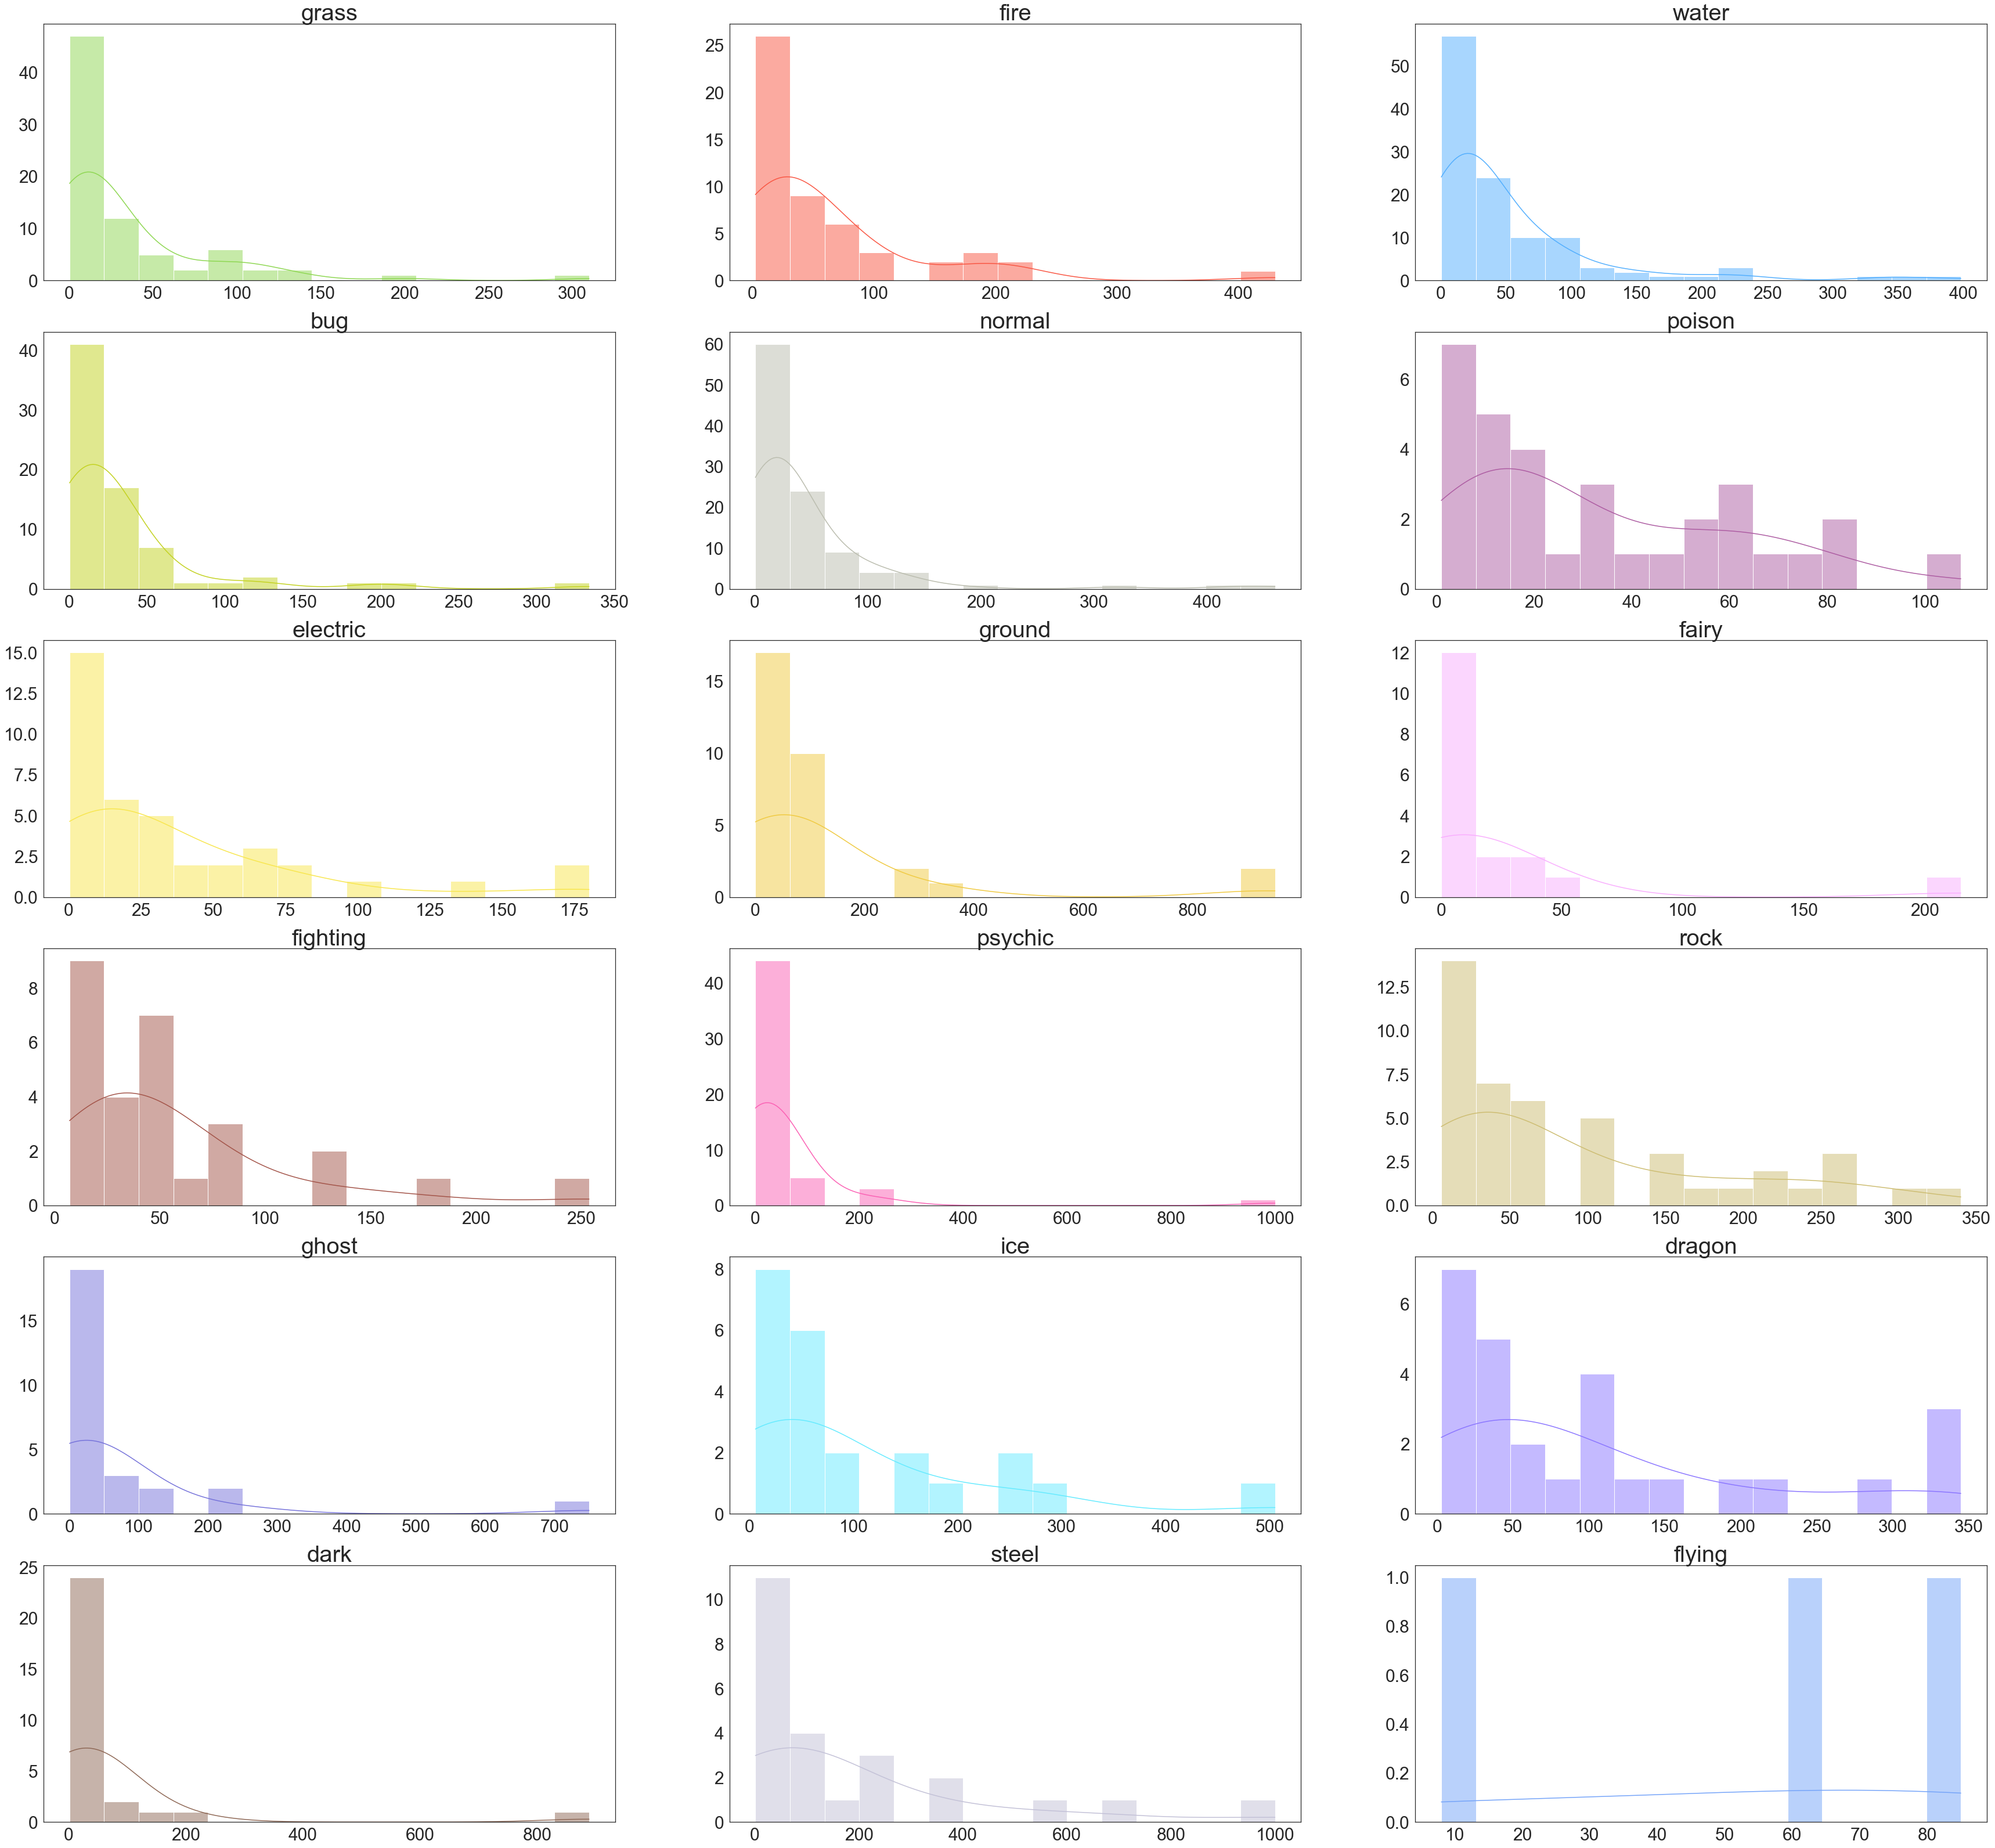

In [170]:
plt.subplots(figsize=(60,57))
sns.set(rc={'xtick.labelsize': 30, 'ytick.labelsize': 30, 'axes.titlesize': 40}, style='white')
j = 0
for i in weights:
    plt.subplot(6,3,j+1)
    sns.histplot(weights[i], bins=15 , color=pokemon_colors[pokemon_types[j]], kde=True).set(title=pokemon_types[j],xlabel=None,ylabel=None)
    j = j + 1

Text(0.5, 1.0, 'Analysis of Weight distribution')

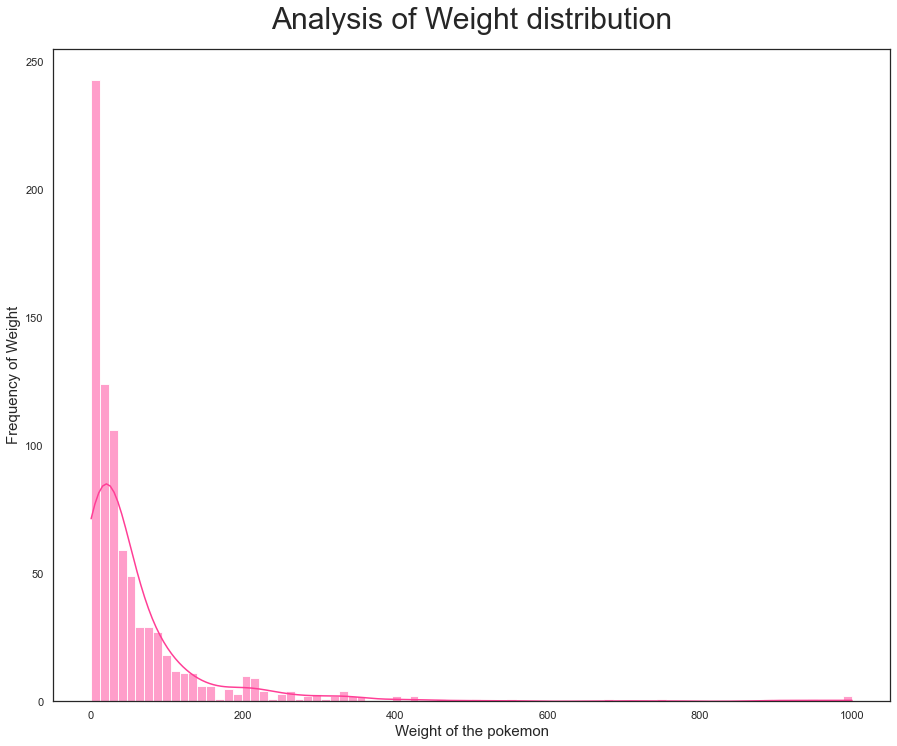

In [171]:
sns.set(rc={'xtick.labelsize': 11, 'ytick.labelsize': 11, 'axes.titlesize': 15, "axes.grid": False}, style='white')
plt.figure(figsize=(15,12))
sns.histplot(pokemon_df, x='weight_kg', color='#FF3E96', kde=True )
plt.xlabel("Weight of the pokemon",fontsize=15)
plt.ylabel("Frequency of Weight",fontsize=15)
plt.title("Analysis of Weight distribution",fontsize=30, pad=20)

In [172]:
pokemon_df.weight_kg.describe()

count    801.000000
mean      60.941199
std      108.514597
min        0.100000
25%        9.000000
50%       27.300000
75%       63.000000
max      999.900000
Name: weight_kg, dtype: float64

# Correlation between Height and Weight of Pokémon:

<AxesSubplot:xlabel='height_m', ylabel='weight_kg'>

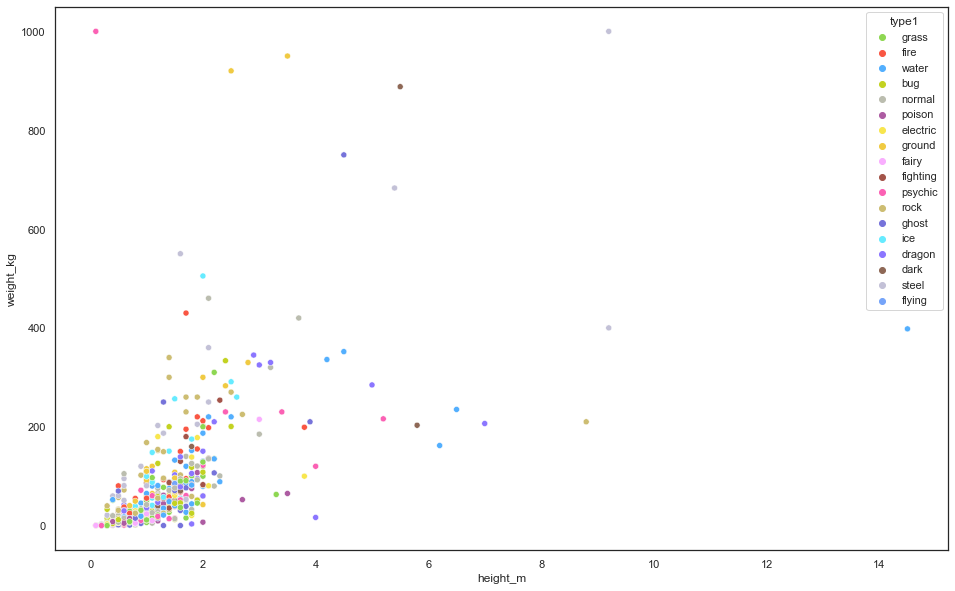

In [173]:
sns.set(rc={'xtick.labelsize': 11, 'ytick.labelsize': 11, 'axes.titlesize': 15, "axes.grid":False}, style='white')
plt.figure(figsize=(16,10))
sns.scatterplot(data=pokemon_df, x='height_m', y='weight_kg', hue='type1', palette=pokemon_colors)


In [174]:
top5_height = pokemon_df[['height_m','name','type1']].sort_values('height_m', ascending=False).head(5)
print(top5_height)

top5_weight = pokemon_df[['weight_kg','name','type1']].sort_values('weight_kg', ascending=False).head(5)
print(top5_weight)

     height_m        name   type1
320      14.5     Wailord   water
207       9.2     Steelix   steel
796       9.2  Celesteela   steel
94        8.8        Onix    rock
383       7.0    Rayquaza  dragon
     weight_kg        name    type1
789      999.9     Cosmoem  psychic
796      999.9  Celesteela    steel
382      950.0     Groudon   ground
749      920.0    Mudsdale   ground
798      888.0    Guzzlord     dark


# Correlation Between Attributes (non-legendary):

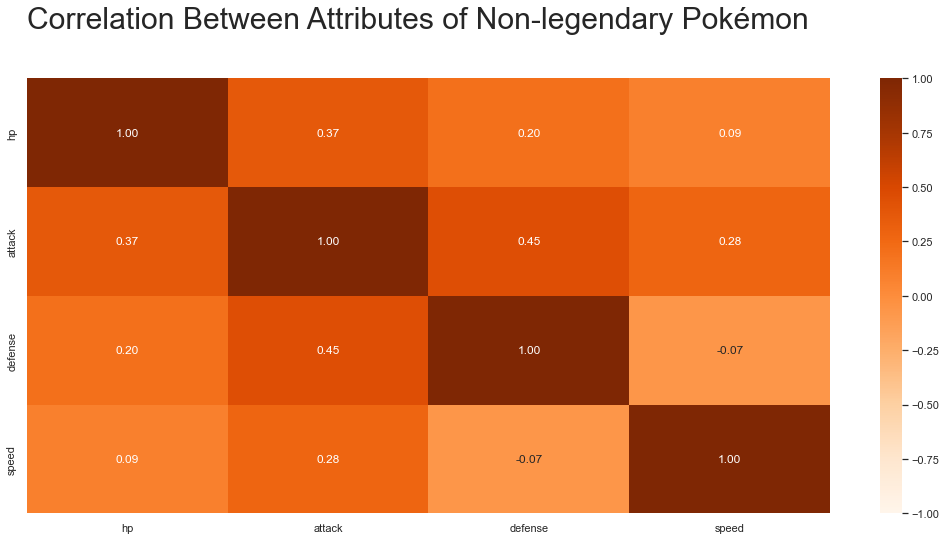

In [175]:
plt.figure(figsize=(18,8))
hads = sns.heatmap((pokemon_df[pokemon_df['is_legendary']==0].loc[:,['hp','attack','defense','speed']]).corr(),
                   annot= True,
                   fmt = ".2f",
                   vmin = -1,
                   vmax = 1,
                   cmap='Oranges')
hads.set_title('Correlation Between Attributes of Non-legendary Pokémon', loc='left', pad=50,fontsize=30);


# Correlation Between Attributes (legendary):

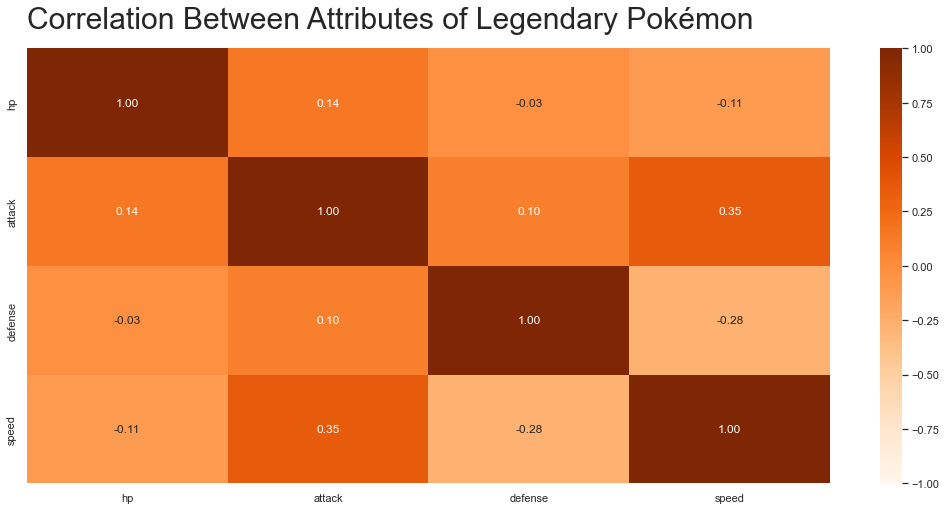

In [176]:
plt.figure(figsize=(18,8))
hads = sns.heatmap((pokemon_df[pokemon_df['is_legendary']==1].loc[:,['hp','attack','defense','speed']]).corr(),
                   annot= True,
                   fmt = ".2f",
                   vmin = -1,
                   vmax = 1,
                   cmap='Oranges')

hads.set_title('Correlation Between Attributes of Legendary Pokémon', loc='left', pad=20, fontsize=30);


# Median of Attributes (non-legendary):

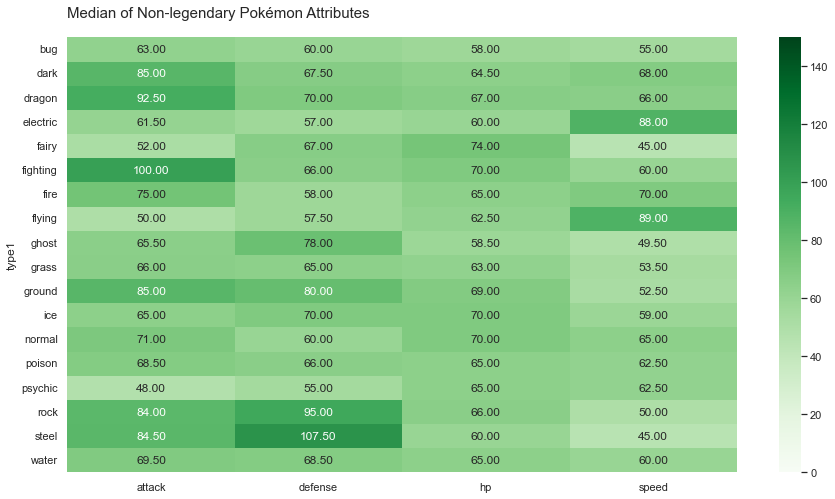

In [177]:
non_legendary = pokemon_df[pokemon_df['is_legendary']==0].groupby(['type1']).median()[['attack','defense','hp','speed']]
plt.figure(figsize=(15,8))
hadss=sns.heatmap(non_legendary,
                  annot= True,
                  fmt = ".02f",
                  vmin = 0,
                  vmax = 150,
                  cmap='Greens')
hadss.set_title('Median of Non-legendary Pokémon Attributes', loc='left', pad=20);

# Median of Attributes (legendary):

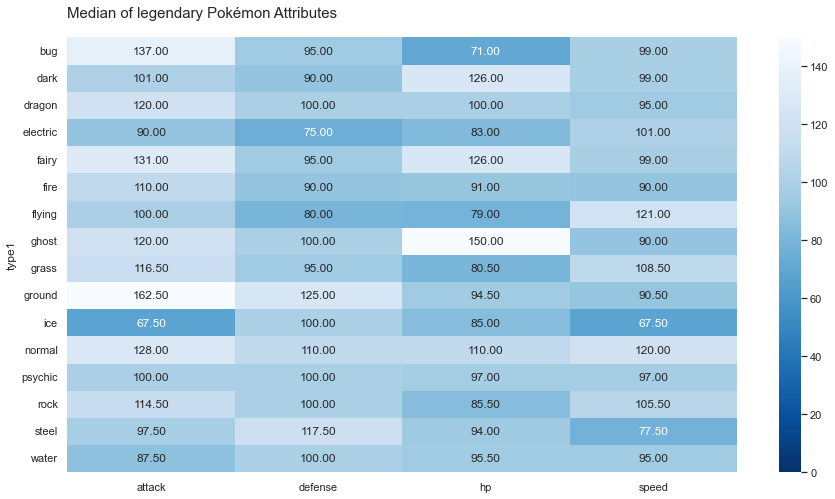

In [178]:
legendary = pokemon_df[pokemon_df['is_legendary'] == 1].groupby(['type1']).median()[['attack', 'defense', 'hp', 'speed']]
plt.figure(figsize=(15, 8))
hadss = sns.heatmap(legendary,
                    annot=True,
                    fmt=".02f",
                    vmin=0,
                    vmax=150,
                    cmap='Blues_r')

hadss.set_title('Median of legendary Pokémon Attributes', loc='left', pad=20);

# Abilities Countplot:

In [179]:
pokemon_df['abilities'] = pokemon_df.apply(lambda x: eval(x['abilities']), axis=1)
pokemon_df['n_abilities'] = pokemon_df.apply(lambda x: len(x['abilities']), axis=1)


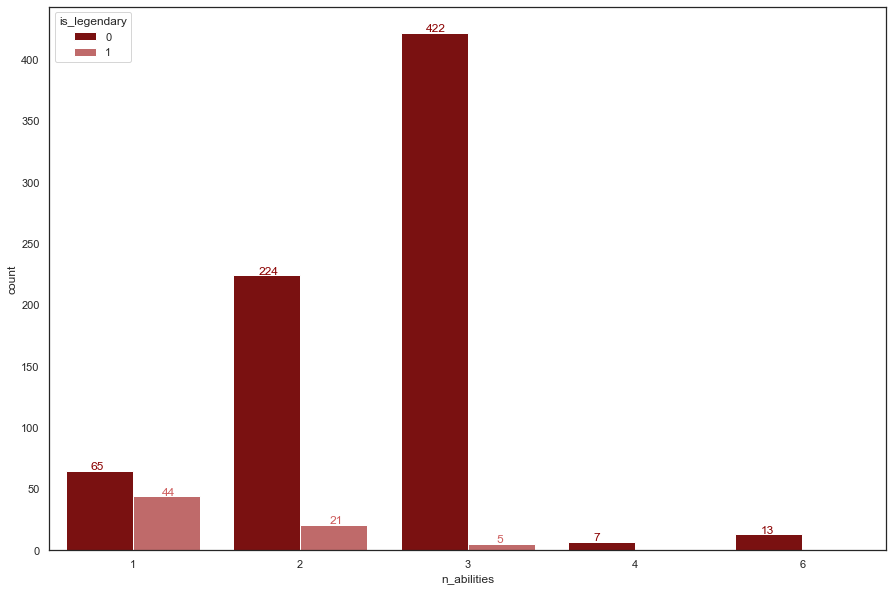

In [180]:
plt.figure(figsize=(15,10))
sns.countplot(data=pokemon_df, x='n_abilities', hue='is_legendary', palette=['darkred', 'indianred'])

for index, value in enumerate(pokemon_df[pokemon_df['is_legendary'] == False].n_abilities.value_counts().sort_index()):
    plt.annotate(f'{value}', xy=(index - 0.25, value + 1), color='darkred')

for index, value in enumerate(pokemon_df[pokemon_df['is_legendary'] == True].n_abilities.value_counts().sort_index()):
    plt.annotate(f'{value}', xy=(index + 0.175, value + 1), color='indianred')

# Effectiveness against types:

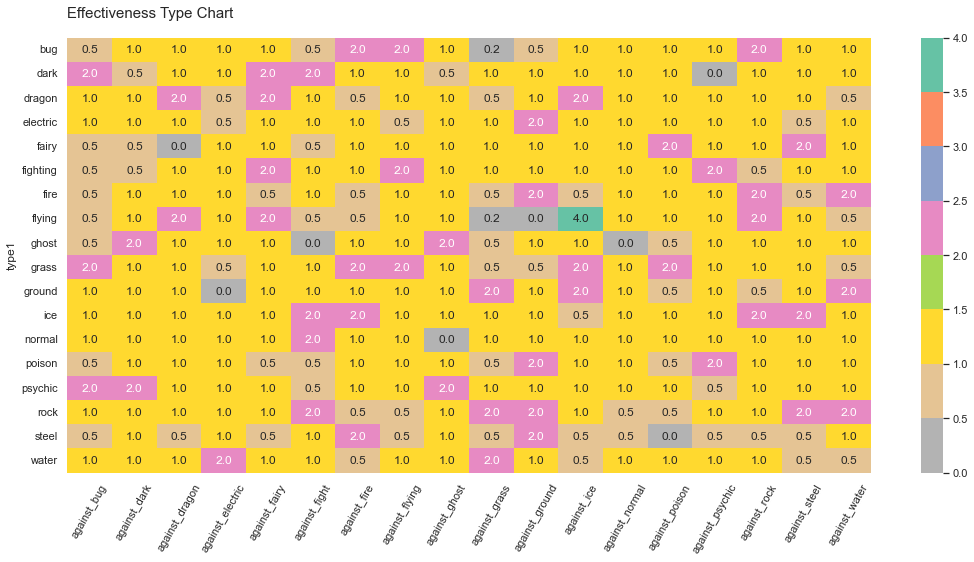

In [181]:
against_columns = ['against_bug', 'against_dark', 'against_dragon', 'against_electric', 'against_fairy',
                   'against_fight', 'against_fire',
                   'against_flying', 'against_ghost', 'against_grass', 'against_ground', 'against_ice',
                   'against_normal', 'against_poison',
                   'against_psychic', 'against_rock', 'against_steel', 'against_water']

effectiveness = pokemon_df.groupby(['type1']).median()[against_columns]
plt.figure(figsize=(18, 8))
effect = sns.heatmap(effectiveness,
                     annot=True,
                     fmt=".1f",
                     vmin=0,
                     vmax=4,
                     cmap='Set2_r')
plt.xticks(rotation=60)
effect.set_title('Effectiveness Type Chart', loc='left', pad=20);

# BMI of Pokémon:

In [182]:
pokemon_df['BMI'] = pokemon_df.apply(lambda x: x['weight_kg']/(x['height_m']**2), axis=1)

Top 10 Pokemon with highest BMI

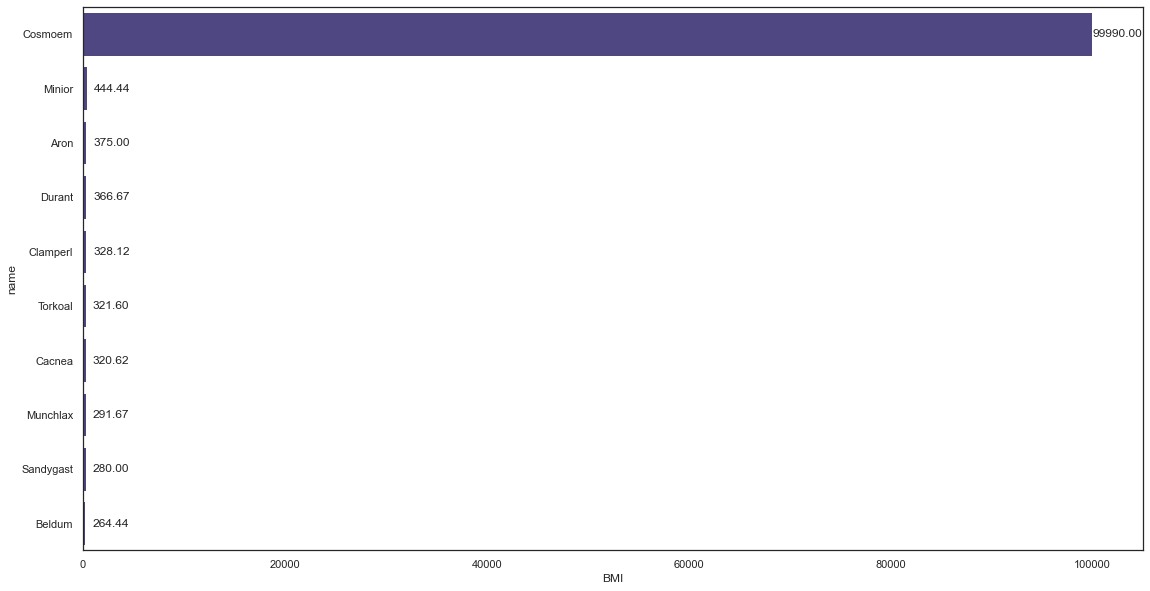

In [183]:
top10_bmi = pokemon_df.nlargest(10,'BMI')
plt.figure(figsize=(19,10))
sns.barplot(y=top10_bmi['name'], x=top10_bmi['BMI'], color='darkslateblue')

for index,bmi in enumerate(top10_bmi.BMI):
    plt.annotate(f'{bmi:.2f}', xy=((bmi+2500),index),horizontalalignment='center', verticalalignment='center')

Top 10 Pokémon with lowest BMI

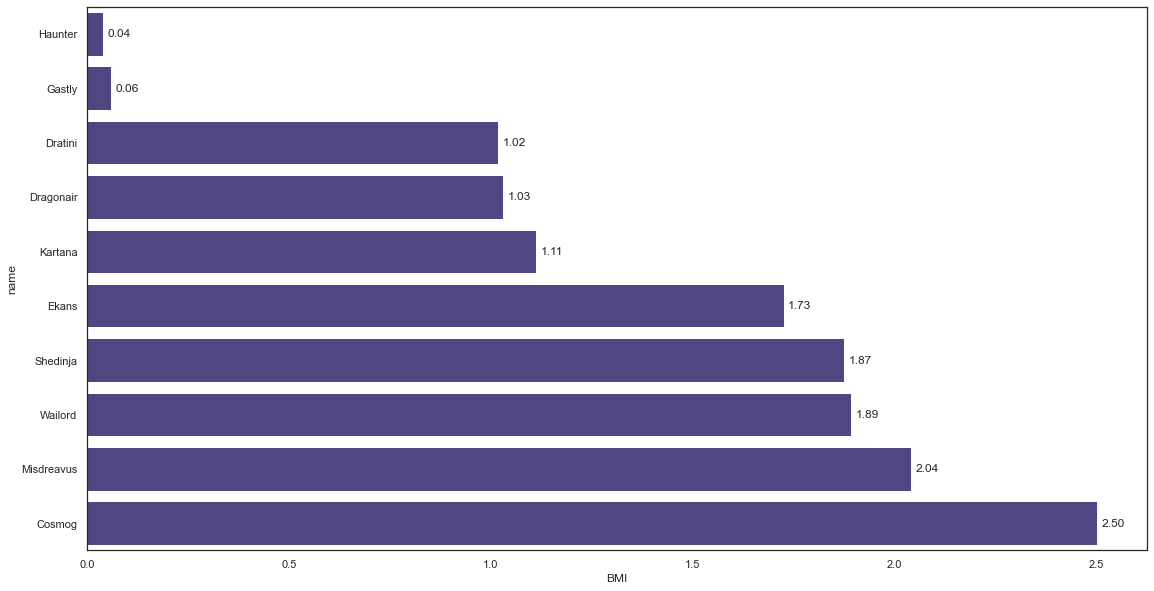

In [184]:
bottom10_bmi = pokemon_df.nsmallest(10,'BMI')
plt.figure(figsize=(19,10))
sns.barplot(y=bottom10_bmi['name'], x=bottom10_bmi['BMI'], color='darkslateblue')

for index,bmi in enumerate(bottom10_bmi.BMI):
    plt.annotate(f'{bmi:.2f}', xy=((bmi+0.04),index),horizontalalignment='center', verticalalignment='center')

# Base Happiness of Pokémon:

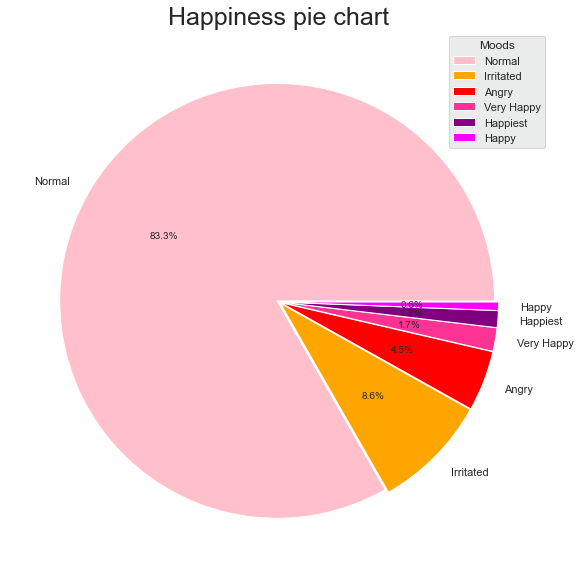

In [197]:
happiness = pokemon_df['base_happiness'].value_counts()
sns.set(rc={"axes.titlesize":25, "font.size": 10})
plt.figure(figsize=(10, 10))
plt.pie(happiness, colors=['pink', 'orange', 'red','#FF3393','purple', 'magenta'], labels=["Normal", "Irritated", "Angry", "Very Happy", "Happiest", "Happy"], autopct='%1.1f%%', explode=[0.01, 0.01, 0.01, 0.01, 0.01, 0.01] )
plt.title("Happiness pie chart")
plt.legend(title="Moods", facecolor="#E5E8E8")

# Capture Rate based on Type:

Text(0.0, 1.0, 'Pokémon Capture Rate by Primary Type')

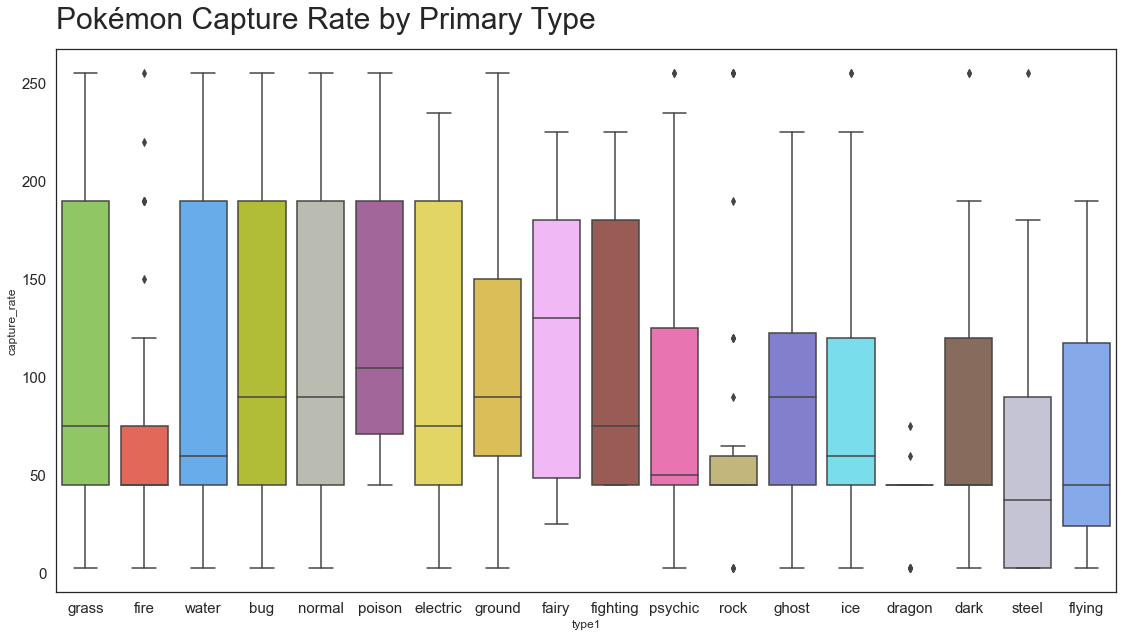

In [186]:
pokemon_df['capture_rate'].replace({'30 (Meteorite)255 (Core)': np.nan}, inplace=True)
pokemon_df['capture_rate'] = pd.to_numeric(pokemon_df['capture_rate'])
plt.figure(figsize=(19,10))
sns.set(rc={'xtick.labelsize': 15, 'ytick.labelsize': 15, 'axes.titlesize': 30, "axes.grid":False}, style='white')
sns.boxplot(x='type1',y='capture_rate', data = pokemon_df, palette=pokemon_colors)
plt.title('Pokémon Capture Rate by Primary Type', loc='left', pad=20)

# Base Total based on Types:

Text(0.0, 1.0, 'Pokémon Base Total by Primary Type')

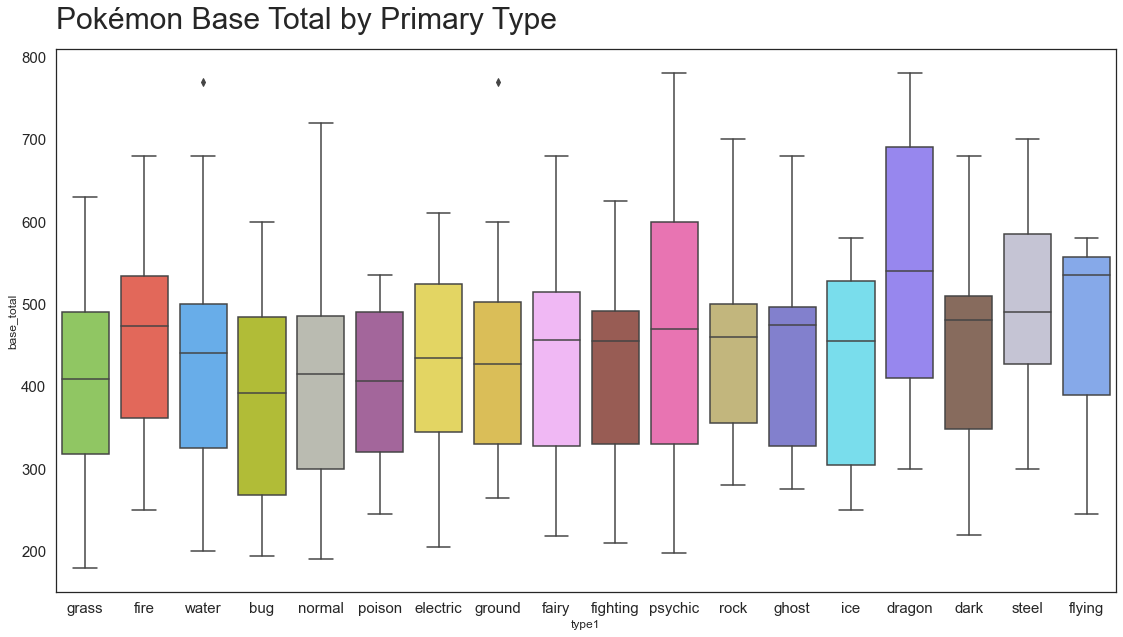

In [187]:
sns.set(rc={'xtick.labelsize': 15, 'ytick.labelsize': 15, 'axes.titlesize': 30, "axes.grid":False}, style='white')
plt.figure(figsize=(19,10))
sns.boxplot(x='type1',y='base_total', data = pokemon_df, palette=pokemon_colors)
plt.title('Pokémon Base Total by Primary Type', loc='left', pad=20)

# TOP 10 POWERFUL POKÉMON:

Text(0.5, 1.0, 'TOP 10')

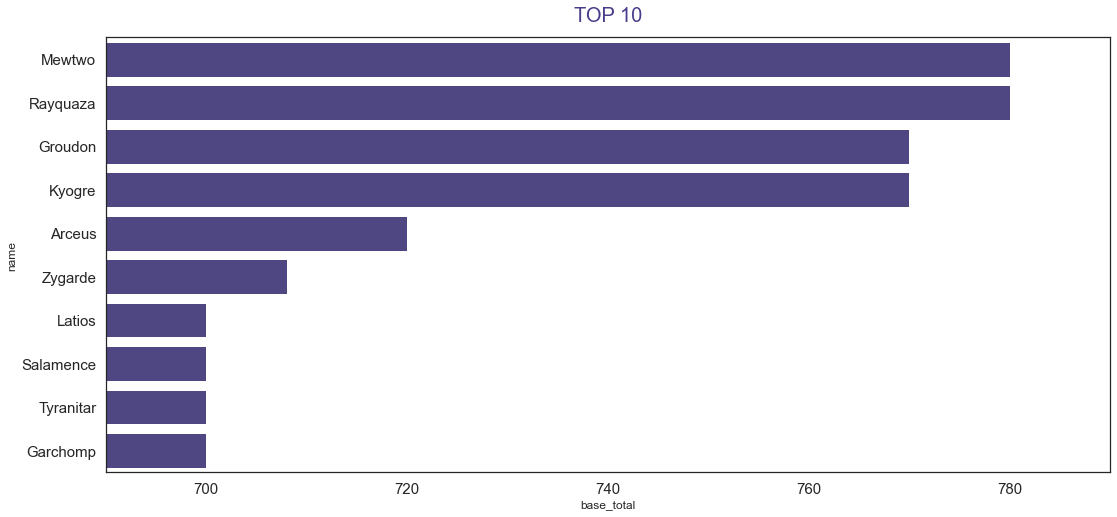

In [188]:
top10_pokemon_base_total = pokemon_df.sort_values(by='base_total', ascending=False).reset_index()[:10]
plt.figure(figsize=(18,8))
ax = sns.barplot(y=top10_pokemon_base_total['name'],
                 x=top10_pokemon_base_total['base_total'],
                 orient='h',
                 color='darkslateblue')

plt.xlim(690, 790)

plt.title('TOP 10', color='darkslateblue', fontsize=20, pad=16)

# RADAR CHART

Text(0.5, 1.0, 'Mewtwo vs Rayquaza')

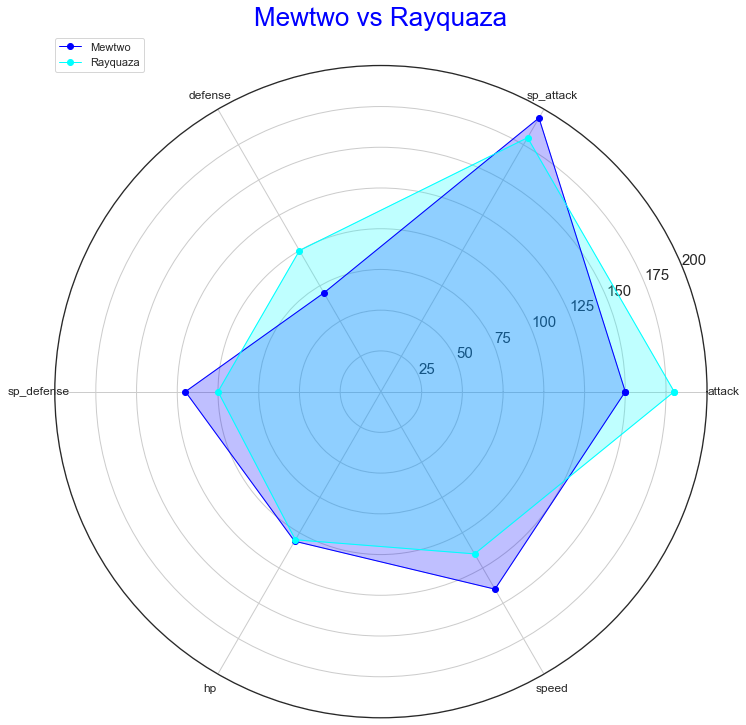

In [189]:
attributes=['attack', 'sp_attack', 'defense', 'sp_defense', 'hp', 'speed']
mewtwo=top10_pokemon_base_total[top10_pokemon_base_total['name']=='Mewtwo'][attributes].values.tolist()[0]

rayquaza=top10_pokemon_base_total[top10_pokemon_base_total['name']=='Rayquaza'][attributes].values.tolist()[0]

angles=np.linspace(0,2*np.pi,len(attributes), endpoint=False)
angles=np.concatenate((angles,[angles[0]]))
attributes.append(attributes[0])
mewtwo.append(mewtwo[0])
rayquaza.append(rayquaza[0])

fig=plt.figure(figsize=(18,12))
rc=fig.add_subplot(111, polar=True)

rc.plot(angles, mewtwo, 'o-', color='blue', linewidth=1, label='Mewtwo')
rc.fill(angles, mewtwo, alpha=0.25, color='blue')

rc.plot(angles,rayquaza, 'o-', color='cyan', linewidth=1, label='Rayquaza')
rc.fill(angles, rayquaza, alpha=0.25, color='cyan')

rc.set_thetagrids(angles[:-1] * 180/np.pi, attributes[:-1], fontsize=12)
plt.grid(True)

handles, labels = rc.get_legend_handles_labels()
rc.legend(handles, ['Mewtwo', 'Rayquaza'], loc=(0,0.99))

rc.set_title("Mewtwo vs Rayquaza", pad=40, fontsize=26, color='blue')

In [190]:
top10_pokemon_base_total = pokemon_df.sort_values(by='base_total', ascending=False).reset_index()[:3]

top10_pokemon_base_total

,index,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,...,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary,type,n_abilities,BMI
0,149,"[Pressure, Unnerve]",2.0,2.0,1.0,1.0,1.0,0.5,1.0,1.0,...,120,140,psychic,NaN,122.0,1,1,psychic_,2,30.500000
1,383,[Air Lock],0.5,1.0,2.0,1.0,2.0,0.5,0.5,1.0,...,100,115,dragon,flying,206.5,3,1,dragon_flying,1,4.214286
2,382,[Drought],1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,90,90,ground,NaN,950.0,3,1,ground_,1,77.551020


# TOP 10 LEAST POWERFUL POKÉMON:

Text(0.5, 1.0, 'BOTTOM 10')

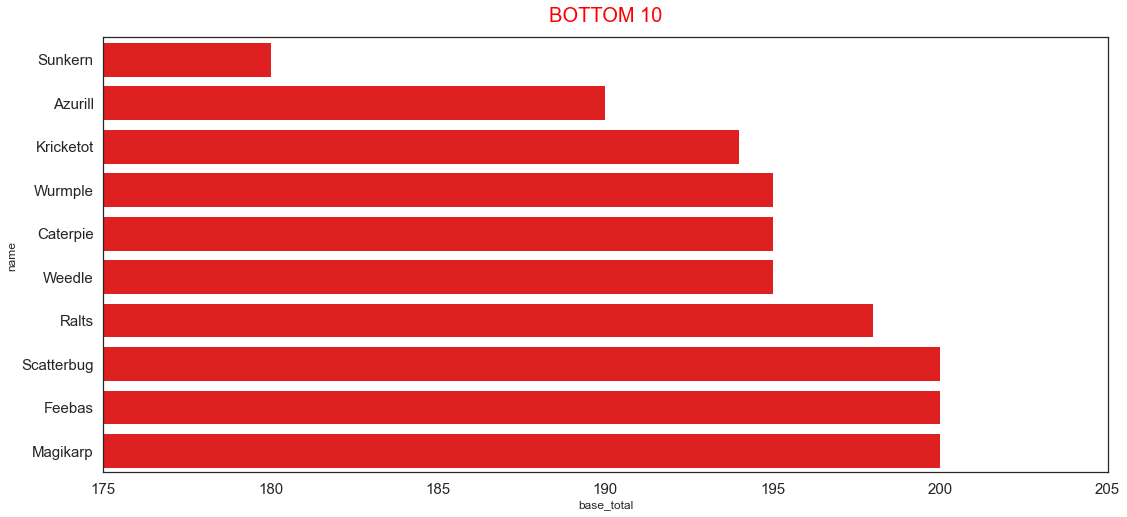

In [191]:
bottom10_pokemon_base_total = pokemon_df.sort_values(by='base_total', ascending=True).reset_index()[:10]
plt.figure(figsize=(18,8))
ax = sns.barplot(y=bottom10_pokemon_base_total['name'],
                 x=bottom10_pokemon_base_total['base_total'],
                 color='red')

plt.xlim(175, 205)

plt.title('BOTTOM 10', color='red', fontsize=20, pad=16)

# RADAR CHART

Text(0.5, 1.0, 'Sunkern vs Azurill')

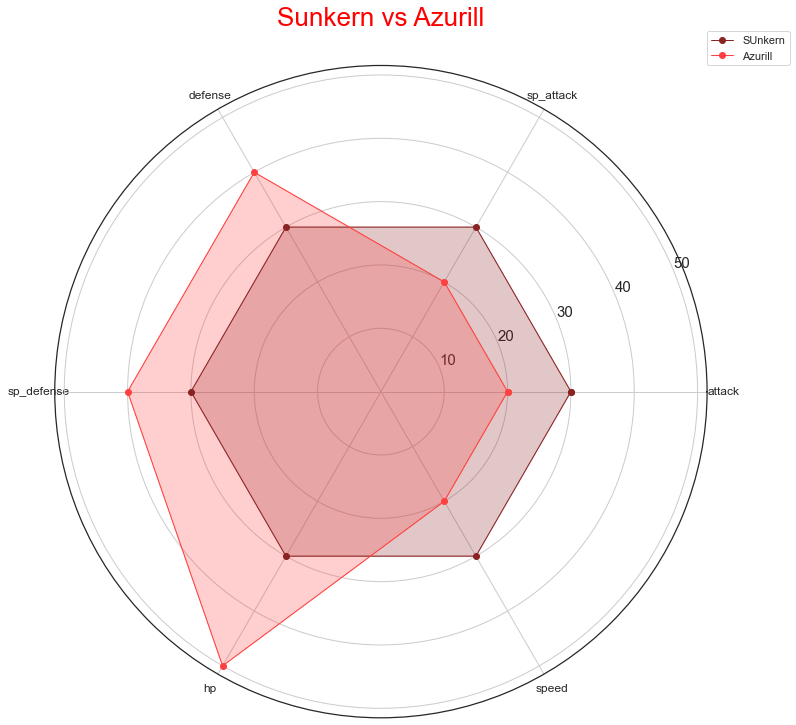

In [192]:
attributes=['attack', 'sp_attack', 'defense', 'sp_defense', 'hp', 'speed']
Sunkern=bottom10_pokemon_base_total[bottom10_pokemon_base_total['name']=='Sunkern'][attributes].values.tolist()[0]
Azurill=bottom10_pokemon_base_total[bottom10_pokemon_base_total['name']=='Azurill'][attributes].values.tolist()[0]
angles=np.linspace(0,2*np.pi,len(attributes), endpoint=False)
angles=np.concatenate((angles,[angles[0]]))
attributes.append(attributes[0])
Sunkern.append(Sunkern[0])
Azurill.append(Azurill[0])

fig=plt.figure(figsize=(18,12))
rc_=fig.add_subplot(111, polar=True)

rc_.plot(angles, Sunkern, 'o-', color='#8B2323', linewidth=1, label='Sunkern')
rc_.fill(angles, Sunkern, alpha=0.25, color='#8B2323')

rc_.plot(angles, Azurill, 'o-', color='#FF4040', linewidth=1, label='Azurill')
rc_.fill(angles, Azurill, alpha=0.25, color='#FF4040')

rc_.set_thetagrids(angles[:-1] * 180/np.pi, attributes[:-1], fontsize=12)
plt.grid(True)

handles, labels = rc_.get_legend_handles_labels()
rc_.legend(handles, ['SUnkern', 'Azurill'], loc=(1,1))

rc_.set_title('Sunkern vs Azurill', pad=40, fontsize=26, color='red')

In [193]:
pokemon_df.groupby(['type1']).median()['height_m']

type1
bug         0.80
dark        1.00
dragon      1.60
electric    0.80
fairy       0.60
fighting    1.25
fire        1.00
flying      1.50
ghost       1.00
grass       0.85
ground      1.00
ice         1.10
normal      0.90
poison      0.95
psychic     0.80
rock        1.00
steel       0.95
water       1.00
Name: height_m, dtype: float64

In [194]:
(pokemon_df.loc[:,['height_m','weight_kg']]).corr()

,height_m,weight_kg
height_m,1.000000,0.626438
weight_kg,0.626438,1.000000


In [201]:
d= pokemon_df[pokemon_df.duplicated(['name'])]

In [202]:
d

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary,type,n_abilities,BMI


In [203]:
pokemon_df.base_happiness.unique()

array([ 70, 140,  35,   0, 100,  90], dtype=int64)